# Library

In [ ]:
pip install tensorflow

In [ ]:
!pip install --upgrade tensorflow

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout  # Pastikan Dropout diimpor
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model


# Connent Googgel Drive

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df = pd.read_csv('/content/drive/MyDrive/BPS (Harga Beras)/data_beras_silinda.csv')
df.head()

,date,medium_cikurubuk,medium_pancasila,premium_cikurubuk,premium_pancasila
0,2021-06-07,10500,10500,12000,11000
1,2022-02-09,10000,10500,11000,11000
2,2022-02-10,10000,10500,11000,11000
3,2022-02-11,10000,10500,11000,11000
4,2022-02-14,10000,10500,11000,11000


In [65]:
# prompt: drop coloum baris 0 pada colum date

df = df.drop(df.index[0])


In [66]:
df.head()

,date,medium_cikurubuk,medium_pancasila,premium_cikurubuk,premium_pancasila
1,2022-02-09,10000,10500,11000,11000
2,2022-02-10,10000,10500,11000,11000
3,2022-02-11,10000,10500,11000,11000
4,2022-02-14,10000,10500,11000,11000
5,2022-02-16,10000,10500,11000,11000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 1 to 715
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               715 non-null    object
 1   medium_cikurubuk   715 non-null    int64 
 2   medium_pancasila   715 non-null    int64 
 3   premium_cikurubuk  715 non-null    int64 
 4   premium_pancasila  715 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 28.1+ KB


In [68]:
numeric_column = ['medium_cikurubuk', 'medium_pancasila', 'premium_cikurubuk', 'premium_pancasila']

# Mengganti nilai non-numerik dengan NaN lalu mengonversi ke int
df[numeric_column] = df[numeric_column].apply(pd.to_numeric, errors='coerce')

# Mengganti NaN dengan 0 jika diperlukan (opsional)
df.fillna(0, inplace=True)

# Konversi ke integer
df[numeric_column] = df[numeric_column].astype(int)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 1 to 715
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               715 non-null    object
 1   medium_cikurubuk   715 non-null    int64 
 2   medium_pancasila   715 non-null    int64 
 3   premium_cikurubuk  715 non-null    int64 
 4   premium_pancasila  715 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 28.1+ KB


In [70]:
df.describe()

,medium_cikurubuk,medium_pancasila,premium_cikurubuk,premium_pancasila
count,715.000000,715.000000,715.00000,715.000000
mean,12899.580420,12904.195804,13589.51049,13627.622378
std,1353.915824,1445.163581,1408.43116,1664.284134
min,10000.000000,10500.000000,11000.00000,11000.000000
25%,12500.000000,12000.000000,13000.00000,12500.000000
50%,12500.000000,13000.000000,13500.00000,13500.000000
75%,13500.000000,14000.000000,14800.00000,15000.000000
max,15800.000000,16000.000000,16500.00000,17000.000000


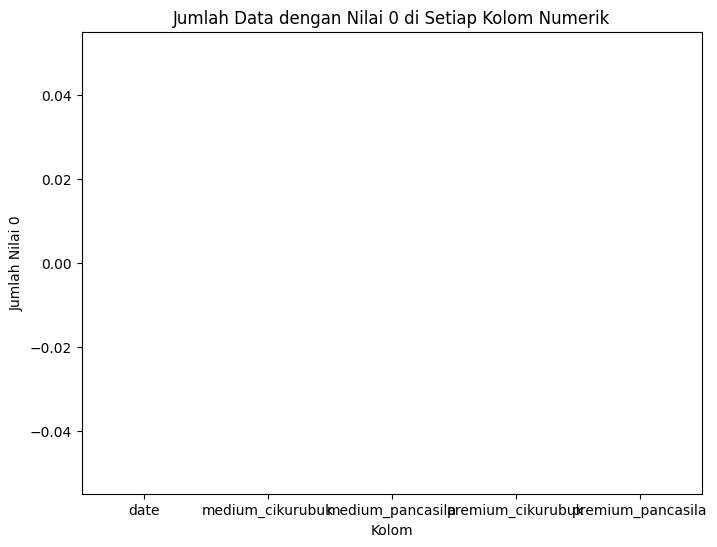

In [71]:
# Pastikan kolom numerik sudah diubah ke tipe numerik
df[numeric_column] = df[numeric_column].apply(pd.to_numeric, errors='coerce')

# Memfilter baris di mana semua kolom di dalam 'numeric_column' memiliki nilai 0
filtered_df = df[(df[numeric_column] == 0).all(axis=1)]

# Menghitung jumlah nilai 0 di setiap kolom numerik dari filtered_df
zero_counts = (filtered_df == 0).sum()

# Membuat bar chart untuk menampilkan jumlah data dengan nilai 0
plt.figure(figsize=(8, 6))
sns.barplot(x=zero_counts.index, y=zero_counts.values)

# Memberikan label dan judul
plt.xlabel('Kolom')
plt.ylabel('Jumlah Nilai 0')
plt.title('Jumlah Data dengan Nilai 0 di Setiap Kolom Numerik')

# Menampilkan visualisasi
plt.show()

In [72]:
len(filtered_df)

0

In [73]:
# Mengganti nilai 0 dengan NaN agar mudah dalam pengisian
df[numeric_column] = df[numeric_column].replace(0, pd.NA)

# Mengisi nilai NaN (dulunya 0) dengan nilai dari tanggal terdekat
df[numeric_column] = df[numeric_column].ffill()  # Mengisi dengan nilai sebelumnya (forward fill)
df[numeric_column] = df[numeric_column].bfill()  # Mengisi dengan nilai sesudahnya (backward fill)

# Menampilkan hasil
df.head(20)

,date,medium_cikurubuk,medium_pancasila,premium_cikurubuk,premium_pancasila
1,2022-02-09,10000,10500,11000,11000
2,2022-02-10,10000,10500,11000,11000
3,2022-02-11,10000,10500,11000,11000
4,2022-02-14,10000,10500,11000,11000
5,2022-02-16,10000,10500,11000,11000
6,2022-02-17,10000,10500,11000,11000
7,2022-02-23,10000,10500,11000,11000
8,2022-02-25,10000,10500,11000,11000
9,2022-03-01,10000,10500,11000,11000
10,2022-03-07,10000,10500,11000,11000


In [74]:
# Memfilter baris di mana semua kolom di dalam 'numeric_column' memiliki nilai 0
filtered_df = df[(df[numeric_column] == 0).all(axis=1)]

# Menampilkan hasil
len(filtered_df)

0

In [75]:
# Membuat DataFrame dari data yang diberikan
df = pd.DataFrame(df)

# Mengubah kolom 'date' menjadi tipe datetime
df['date'] = pd.to_datetime(df['date'])

# Buat range tanggal lengkap dari 9 Februari 2022 hingga 1 September 2024
full_date_range = pd.date_range(start='2022-02-09', end='2024-09-01')

# Setel 'date' sebagai index dari DataFrame
df.set_index('date', inplace=True)

# Gabungkan DataFrame dengan full_date_range, sehingga tanggal yang hilang akan menjadi NaN
df_full = df.reindex(full_date_range)

# Isi tanggal yang hilang dengan nilai harga beras dari tanggal terdekat
df_full = df_full.ffill()  # Forward fill (dari tanggal sebelumnya)
df_full = df_full.bfill()  # Backward fill (dari tanggal sesudahnya)

# Jika ingin mengembalikan 'date' menjadi kolom
df_full.reset_index(inplace=True)
df_full.rename(columns={'index': 'date'}, inplace=True)

# Menampilkan hasil
df_full.head(20)

,date,medium_cikurubuk,medium_pancasila,premium_cikurubuk,premium_pancasila
0,2022-02-09,10000.0,10500.0,11000.0,11000.0
1,2022-02-10,10000.0,10500.0,11000.0,11000.0
2,2022-02-11,10000.0,10500.0,11000.0,11000.0
3,2022-02-12,10000.0,10500.0,11000.0,11000.0
4,2022-02-13,10000.0,10500.0,11000.0,11000.0
5,2022-02-14,10000.0,10500.0,11000.0,11000.0
6,2022-02-15,10000.0,10500.0,11000.0,11000.0
7,2022-02-16,10000.0,10500.0,11000.0,11000.0
8,2022-02-17,10000.0,10500.0,11000.0,11000.0
9,2022-02-18,10000.0,10500.0,11000.0,11000.0


In [76]:
df_full.tail()

,date,medium_cikurubuk,medium_pancasila,premium_cikurubuk,premium_pancasila
931,2024-08-28,13500.0,14000.0,14800.0,16000.0
932,2024-08-29,13500.0,14000.0,14800.0,16000.0
933,2024-08-30,13500.0,14000.0,14800.0,16000.0
934,2024-08-31,13500.0,14000.0,14800.0,16000.0
935,2024-09-01,13500.0,14000.0,14800.0,16000.0


In [77]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               936 non-null    datetime64[ns]
 1   medium_cikurubuk   936 non-null    float64       
 2   medium_pancasila   936 non-null    float64       
 3   premium_cikurubuk  936 non-null    float64       
 4   premium_pancasila  936 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 36.7 KB


In [78]:
df_full.describe()

,date,medium_cikurubuk,medium_pancasila,premium_cikurubuk,premium_pancasila
count,936,936.000000,936.000000,936.000000,936.000000
mean,2023-05-22 12:00:00,12228.846154,12339.743590,12982.371795,13010.416667
min,2022-02-09 00:00:00,10000.000000,10500.000000,11000.000000,11000.000000
25%,2022-09-30 18:00:00,10500.000000,10500.000000,11000.000000,11000.000000
50%,2023-05-22 12:00:00,12500.000000,12000.000000,13000.000000,12500.000000
75%,2024-01-11 06:00:00,13500.000000,14000.000000,14200.000000,14500.000000
max,2024-09-01 00:00:00,15800.000000,16000.000000,16500.000000,17000.000000
std,NaN,1695.201202,1622.192857,1648.377629,1831.311426


In [79]:
# Pastikan kolom 'date' adalah tipe datetime
df_full['date'] = pd.to_datetime(df_full['date'])

In [80]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               936 non-null    datetime64[ns]
 1   medium_cikurubuk   936 non-null    float64       
 2   medium_pancasila   936 non-null    float64       
 3   premium_cikurubuk  936 non-null    float64       
 4   premium_pancasila  936 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 36.7 KB


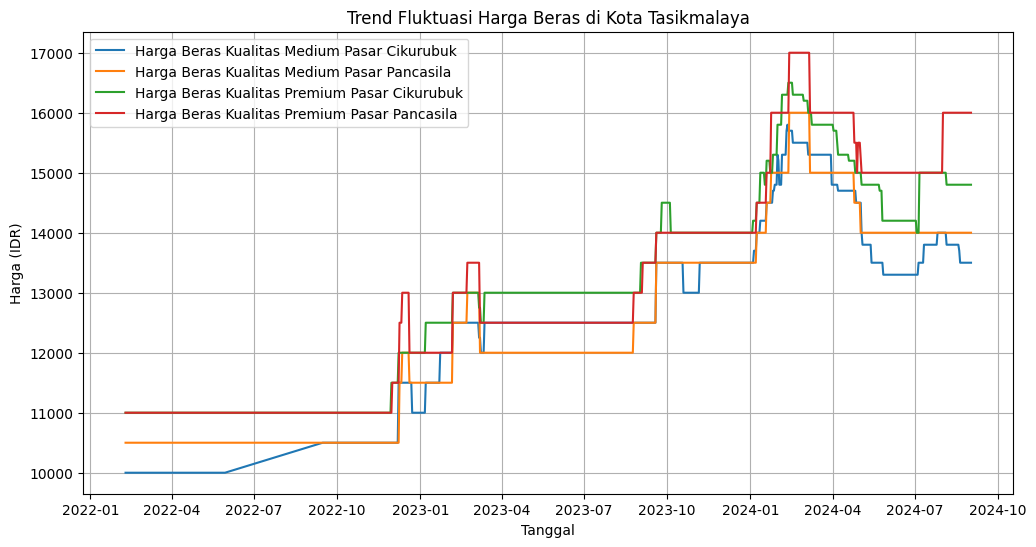

In [81]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='medium_cikurubuk', data=df, label='Harga Beras Kualitas Medium Pasar Cikurubuk')
sns.lineplot(x='date', y='medium_pancasila', data=df, label='Harga Beras Kualitas Medium Pasar Pancasila')
sns.lineplot(x='date', y='premium_cikurubuk', data=df, label='Harga Beras Kualitas Premium Pasar Cikurubuk')
sns.lineplot(x='date', y='premium_pancasila', data=df, label='Harga Beras Kualitas Premium Pasar Pancasila')

plt.title('Trend Fluktuasi Harga Beras di Kota Tasikmalaya')
plt.xlabel('Tanggal')
plt.ylabel('Harga (IDR)')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
# prompt: pisahkan

df_medium_cikurubuk = df_full[['date', 'medium_cikurubuk']]
df_medium_pancasila = df_full[['date', 'medium_pancasila']]
df_premium_cikurubuk = df_full[['date', 'premium_cikurubuk']]
df_premium_pancasila = df_full[['date', 'premium_pancasila']]


In [83]:
# prompt: baca file df_medium_cukurubuk

df_medium_cikurubuk.head()


,date,medium_cikurubuk
0,2022-02-09,10000.0
1,2022-02-10,10000.0
2,2022-02-11,10000.0
3,2022-02-12,10000.0
4,2022-02-13,10000.0


In [84]:
# Menginisialisasi MinMaxScaler dengan rentang (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalisasi data harga beras medium cikurubuk
df_medium_cikurubuk['medium_cikurubuk_normalized'] = scaler.fit_transform(df_medium_cikurubuk[['medium_cikurubuk']])

# Normalisasi data harga beras medium pancasila
df_medium_pancasila['medium_pancasila_normalized'] = scaler.fit_transform(df_medium_pancasila[['medium_pancasila']])

# Normalisasi data harga beras premium cikurubuk
df_premium_cikurubuk['premium_cikurubuk_normalized'] = scaler.fit_transform(df_premium_cikurubuk[['premium_cikurubuk']])

# Normalisasi data harga beras premium pancasila
df_premium_pancasila['premium_pancasila_normalized'] = scaler.fit_transform(df_premium_pancasila[['premium_pancasila']])


<ipython-input-84-f7d76b92bfd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_cikurubuk['medium_cikurubuk_normalized'] = scaler.fit_transform(df_medium_cikurubuk[['medium_cikurubuk']])
<ipython-input-84-f7d76b92bfd2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_pancasila['medium_pancasila_normalized'] = scaler.fit_transform(df_medium_pancasila[['medium_pancasila']])
<ipython-input-84-f7d76b92bfd2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [24]:
df_medium_cikurubuk.head()

,date,medium_cikurubuk,medium_cikurubuk_normalized
0,2022-02-09,10000.0,0.0
1,2022-02-10,10000.0,0.0
2,2022-02-11,10000.0,0.0
3,2022-02-12,10000.0,0.0
4,2022-02-13,10000.0,0.0


In [25]:

df_medium_pancasila.head()

,date,medium_pancasila,medium_pancasila_normalized
0,2022-02-09,10500.0,0.0
1,2022-02-10,10500.0,0.0
2,2022-02-11,10500.0,0.0
3,2022-02-12,10500.0,0.0
4,2022-02-13,10500.0,0.0


In [26]:
df_premium_cikurubuk.head()

,date,premium_cikurubuk,premium_cikurubuk_normalized
0,2022-02-09,11000.0,0.0
1,2022-02-10,11000.0,0.0
2,2022-02-11,11000.0,0.0
3,2022-02-12,11000.0,0.0
4,2022-02-13,11000.0,0.0


In [85]:
df_premium_pancasila.tail()

,date,premium_pancasila,premium_pancasila_normalized
931,2024-08-28,16000.0,0.833333
932,2024-08-29,16000.0,0.833333
933,2024-08-30,16000.0,0.833333
934,2024-08-31,16000.0,0.833333
935,2024-09-01,16000.0,0.833333


In [28]:
print(df_medium_cikurubuk.columns)
print(df_medium_pancasila.columns)
print(df_premium_cikurubuk.columns)
print(df_premium_pancasila.columns)

Index(['date', 'medium_cikurubuk', 'medium_cikurubuk_normalized'], dtype='object')
Index(['date', 'medium_pancasila', 'medium_pancasila_normalized'], dtype='object')
Index(['date', 'premium_cikurubuk', 'premium_cikurubuk_normalized'], dtype='object')
Index(['date', 'premium_pancasila', 'premium_pancasila_normalized'], dtype='object')


<ipython-input-29-81f7b27f516a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_cikurubuk['date'] = pd.to_datetime(df['date'])


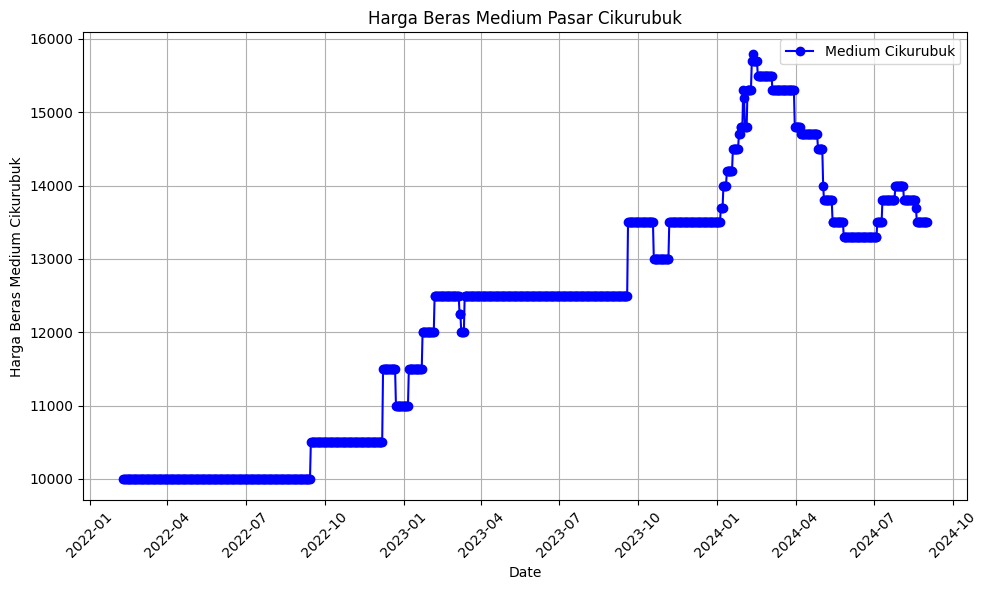

In [29]:
# Convert to DataFrame
df = pd.DataFrame(df_medium_cikurubuk)
df_medium_cikurubuk['date'] = pd.to_datetime(df['date'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['medium_cikurubuk'], marker='o', linestyle='-', color='blue', label='Medium Cikurubuk')
plt.title('Harga Beras Medium Pasar Cikurubuk')
plt.xlabel('Date')
plt.ylabel('Harga Beras Medium Cikurubuk')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-30-0ad1ac2fc4c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_pancasila['date'] = pd.to_datetime(df['date'])


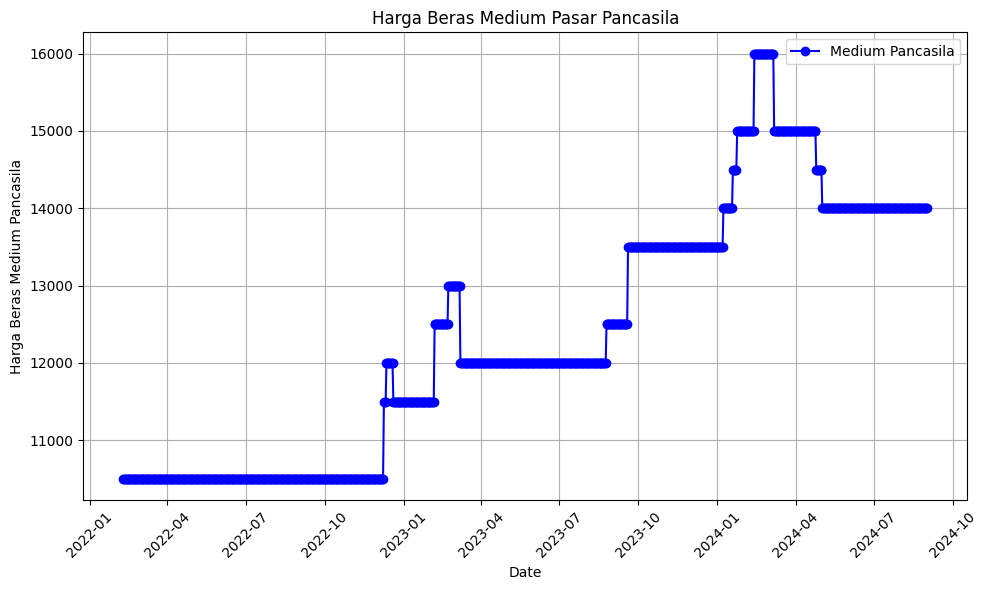

In [30]:
# Convert to DataFrame
df = pd.DataFrame(df_medium_pancasila)
df_medium_pancasila['date'] = pd.to_datetime(df['date'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['medium_pancasila'], marker='o', linestyle='-', color='blue', label='Medium Pancasila')
plt.title('Harga Beras Medium Pasar Pancasila')
plt.xlabel('Date')
plt.ylabel('Harga Beras Medium Pancasila')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-31-df5b2616a85c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_premium_cikurubuk['date'] = pd.to_datetime(df['date'])


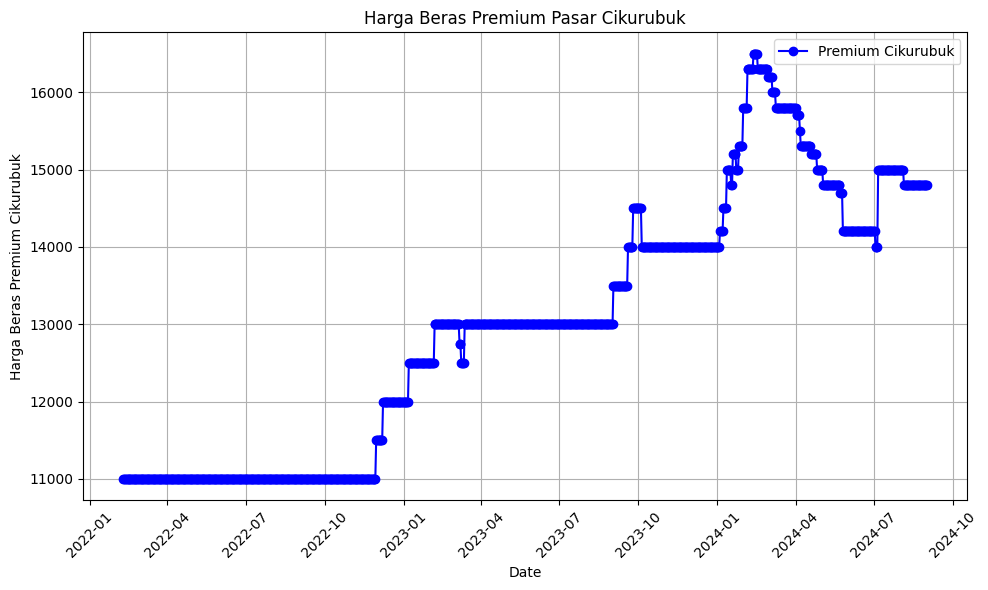

In [31]:
# Convert to DataFrame
df = pd.DataFrame(df_premium_cikurubuk)
df_premium_cikurubuk['date'] = pd.to_datetime(df['date'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['premium_cikurubuk'], marker='o', linestyle='-', color='blue', label='Premium Cikurubuk')
plt.title('Harga Beras Premium Pasar Cikurubuk')
plt.xlabel('Date')
plt.ylabel('Harga Beras Premium Cikurubuk')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-32-e1517f8dc752>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_premium_pancasila['date'] = pd.to_datetime(df['date'])


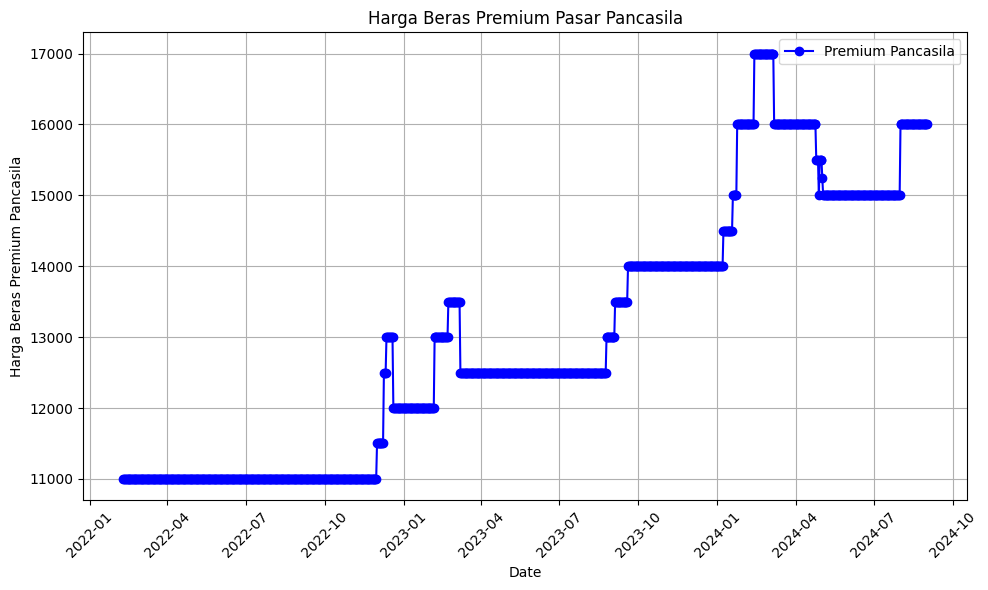

In [32]:
# Convert to DataFrame
df = pd.DataFrame(df_premium_pancasila)
df_premium_pancasila['date'] = pd.to_datetime(df['date'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['premium_pancasila'], marker='o', linestyle='-', color='blue', label='Premium Pancasila')
plt.title('Harga Beras Premium Pasar Pancasila')
plt.xlabel('Date')
plt.ylabel('Harga Beras Premium Pancasila')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

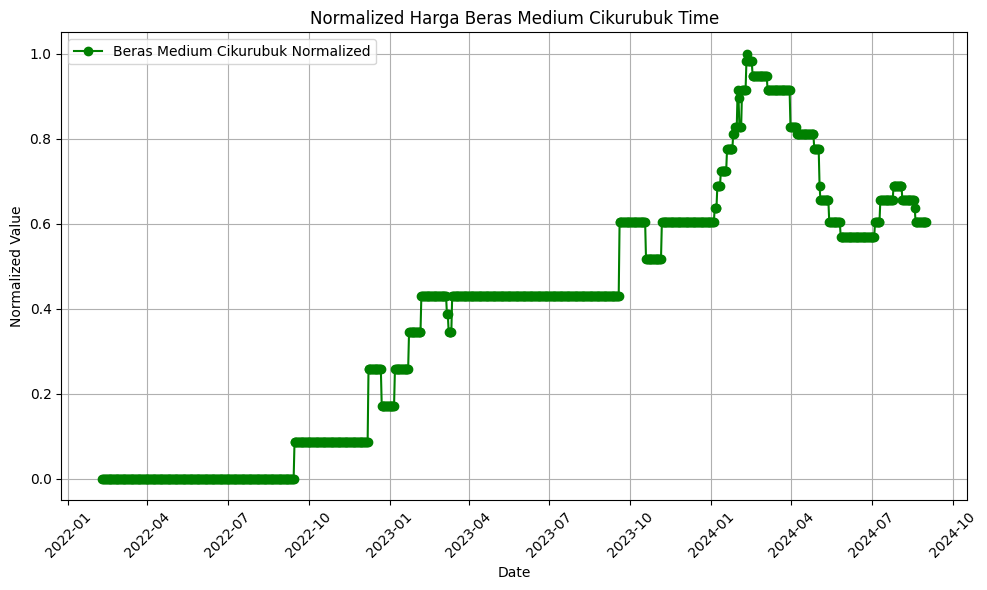

In [33]:
# Convert to DataFrame
df_normalized = pd.DataFrame(df_medium_cikurubuk)
df_normalized['date'] = pd.to_datetime(df_normalized['date'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_normalized['date'], df_normalized['medium_cikurubuk_normalized'], marker='o', linestyle='-', color='green', label='Beras Medium Cikurubuk Normalized')
plt.title('Normalized Harga Beras Medium Cikurubuk Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

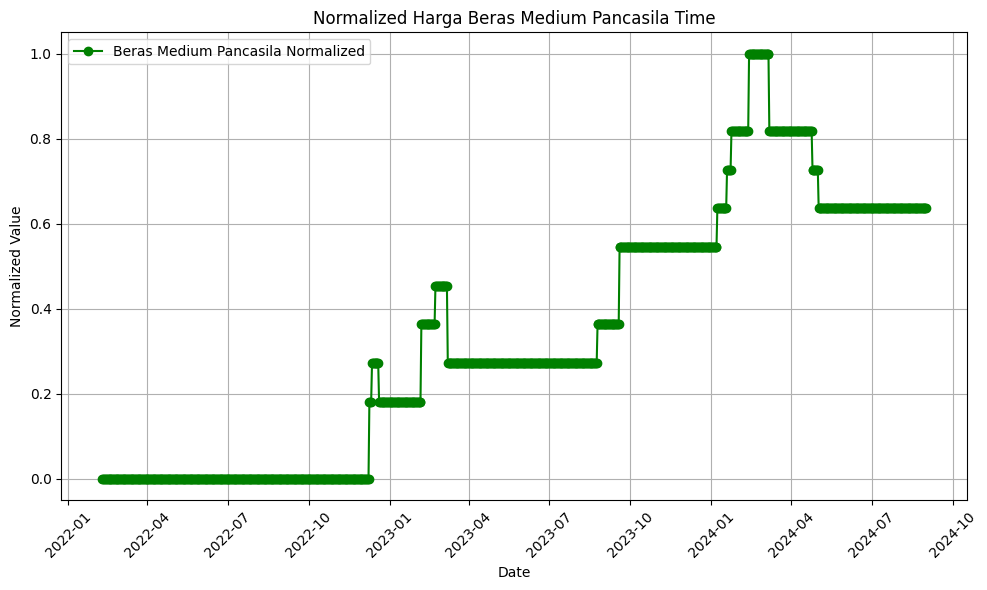

In [34]:
# Convert to DataFrame
df_normalized = pd.DataFrame(df_medium_pancasila)
df_normalized['date'] = pd.to_datetime(df_normalized['date'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_normalized['date'], df_normalized['medium_pancasila_normalized'], marker='o', linestyle='-', color='green', label='Beras Medium Pancasila Normalized')
plt.title('Normalized Harga Beras Medium Pancasila Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

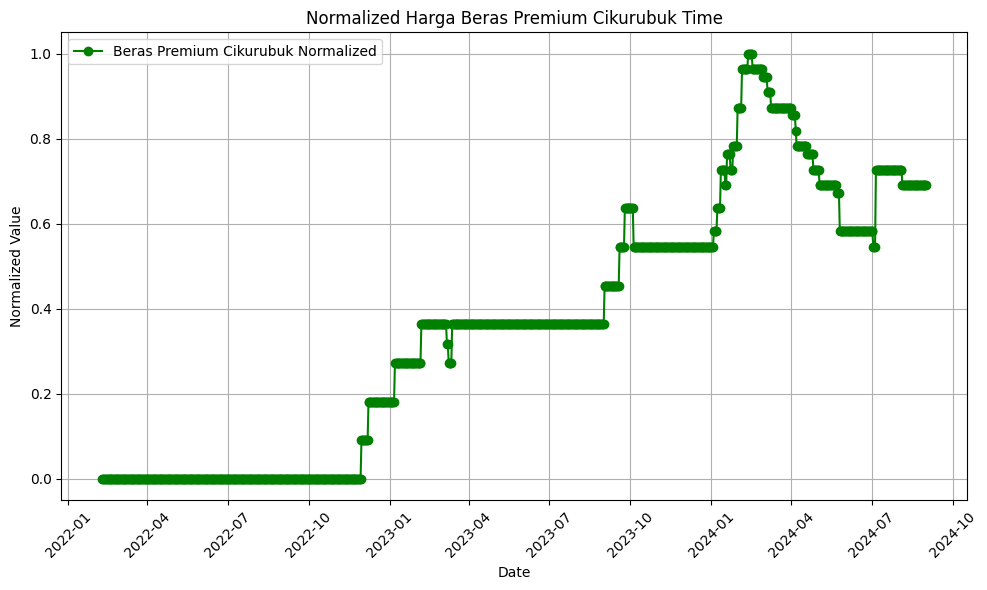

In [35]:
# Convert to DataFrame
df_normalized = pd.DataFrame(df_premium_cikurubuk)
df_normalized['date'] = pd.to_datetime(df_normalized['date'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_normalized['date'], df_normalized['premium_cikurubuk_normalized'], marker='o', linestyle='-', color='green', label='Beras Premium Cikurubuk Normalized')
plt.title('Normalized Harga Beras Premium Cikurubuk Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

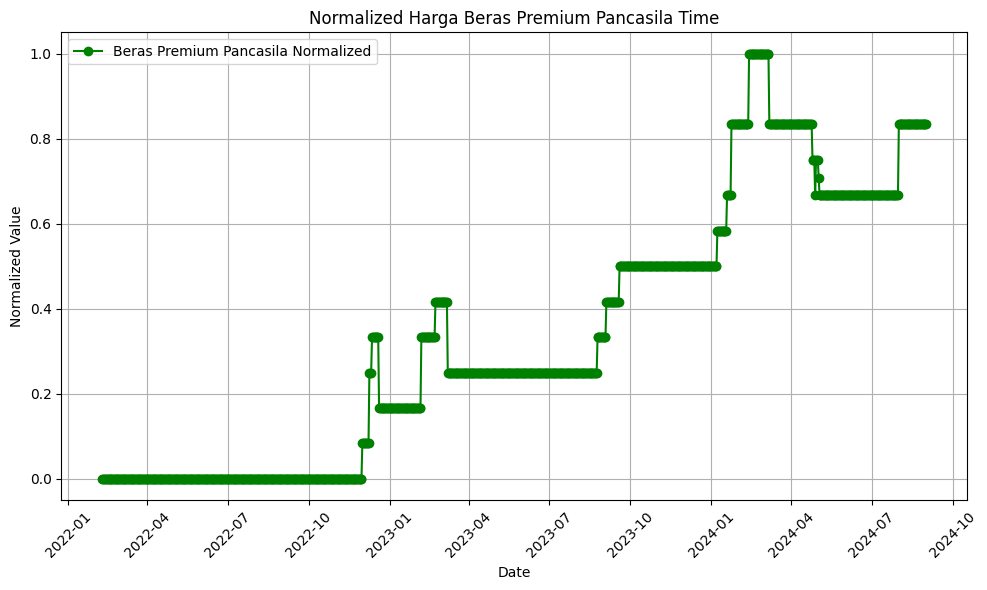

In [36]:
# Convert to DataFrame
df_normalized = pd.DataFrame(df_premium_pancasila)
df_normalized['date'] = pd.to_datetime(df_normalized['date'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_normalized['date'], df_normalized['premium_pancasila_normalized'], marker='o', linestyle='-', color='green', label='Beras Premium Pancasila Normalized')
plt.title('Normalized Harga Beras Premium Pancasila Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# Membagi data menjadi train dan test untuk df_medium_cikurubuk
train_size_medium_cikurubuk = int(len(df_medium_cikurubuk) * 0.8)
train_data_medium_cikurubuk = df_medium_cikurubuk[:train_size_medium_cikurubuk]
test_data_medium_cikurubuk = df_medium_cikurubuk[train_size_medium_cikurubuk:]

# Membagi data menjadi train dan test untuk df_medium_pancasila
train_size_medium_pancasila = int(len(df_medium_pancasila) * 0.8)
train_data_medium_pancasila = df_medium_pancasila[:train_size_medium_pancasila]
test_data_medium_pancasila = df_medium_pancasila[train_size_medium_pancasila:]

# Membagi data menjadi train dan test untuk df_premium_cikurubuk
train_size_premium_cikurubuk = int(len(df_premium_cikurubuk) * 0.8)
train_data_premium_cikurubuk = df_premium_cikurubuk[:train_size_premium_cikurubuk]
test_data_premium_cikurubuk = df_premium_cikurubuk[train_size_premium_cikurubuk:]

# Membagi data menjadi train dan test untuk df_premium_pancasila
train_size_premium_pancasila = int(len(df_premium_pancasila) * 0.8)
train_data_premium_pancasila = df_premium_pancasila[:train_size_premium_pancasila]
test_data_premium_pancasila = df_premium_pancasila[train_size_premium_pancasila:]

# Sekarang Anda memiliki data latih dan data uji untuk setiap DataFrame.
# Data ini dapat digunakan untuk melatih model atau analisis lebih lanjut.


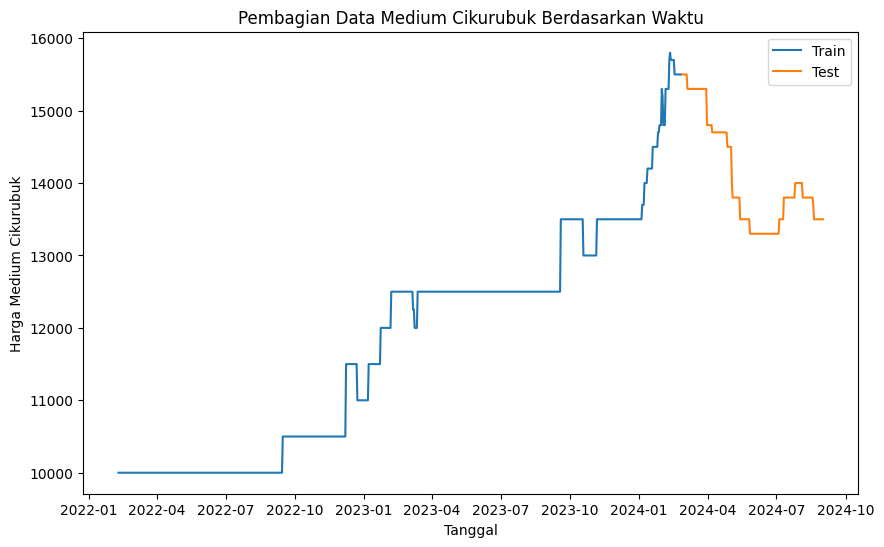

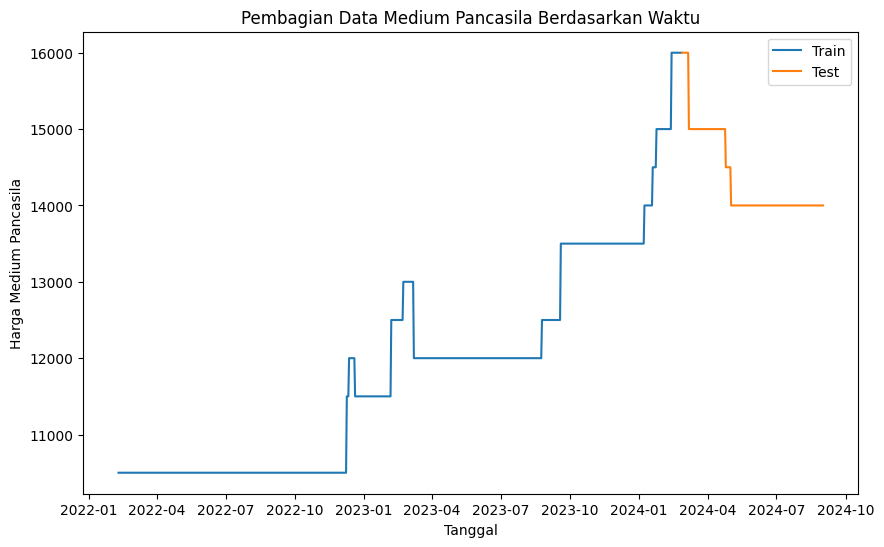

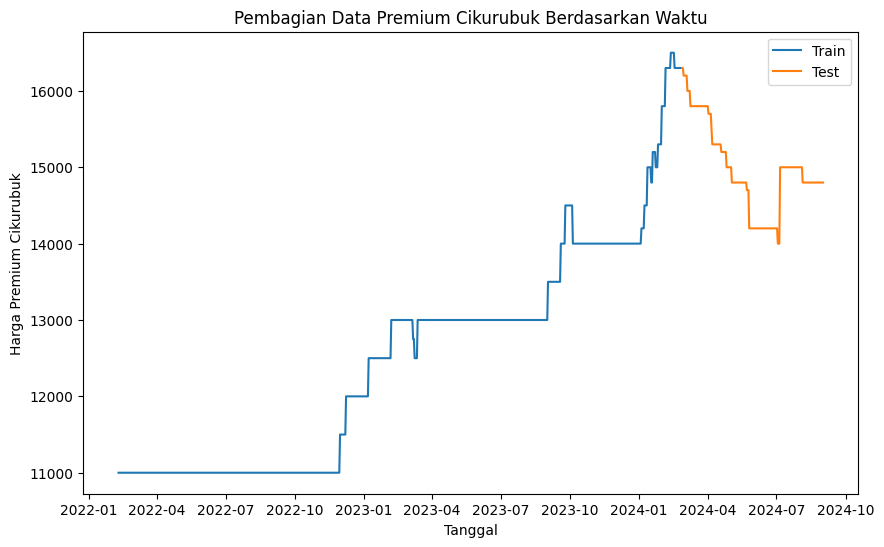

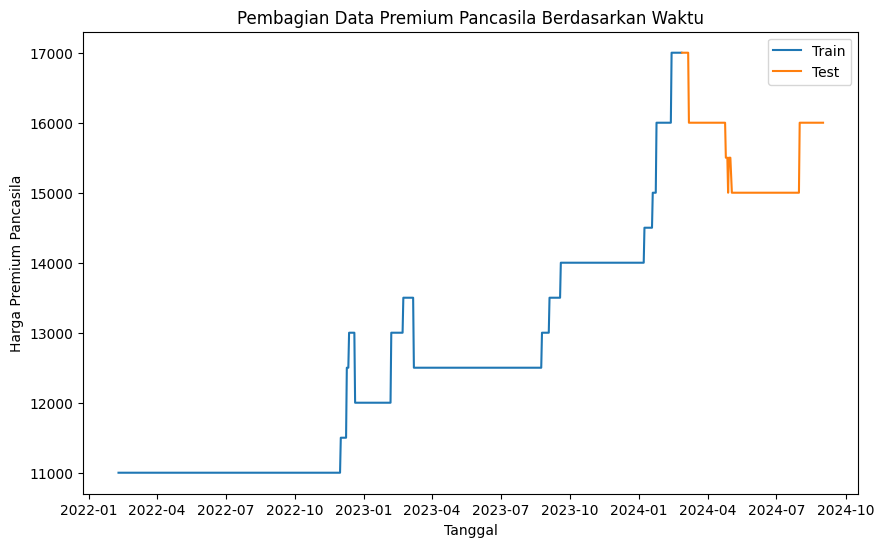

In [38]:
import matplotlib.pyplot as plt

# Visualisasi pembagian data untuk df_medium_cikurubuk
plt.figure(figsize=(10, 6))
plt.plot(train_data_medium_cikurubuk['date'], train_data_medium_cikurubuk['medium_cikurubuk'], label='Train')
plt.plot(test_data_medium_cikurubuk['date'], test_data_medium_cikurubuk['medium_cikurubuk'], label='Test')
plt.xlabel('Tanggal')
plt.ylabel('Harga Medium Cikurubuk')
plt.title('Pembagian Data Medium Cikurubuk Berdasarkan Waktu')
plt.legend()
plt.show()

# Visualisasi pembagian data untuk df_medium_pancasila
plt.figure(figsize=(10, 6))
plt.plot(train_data_medium_pancasila['date'], train_data_medium_pancasila['medium_pancasila'], label='Train')
plt.plot(test_data_medium_pancasila['date'], test_data_medium_pancasila['medium_pancasila'], label='Test')
plt.xlabel('Tanggal')
plt.ylabel('Harga Medium Pancasila')
plt.title('Pembagian Data Medium Pancasila Berdasarkan Waktu')
plt.legend()
plt.show()

# Visualisasi pembagian data untuk df_premium_cikurubuk
plt.figure(figsize=(10, 6))
plt.plot(train_data_premium_cikurubuk['date'], train_data_premium_cikurubuk['premium_cikurubuk'], label='Train')
plt.plot(test_data_premium_cikurubuk['date'], test_data_premium_cikurubuk['premium_cikurubuk'], label='Test')
plt.xlabel('Tanggal')
plt.ylabel('Harga Premium Cikurubuk')
plt.title('Pembagian Data Premium Cikurubuk Berdasarkan Waktu')
plt.legend()
plt.show()

# Visualisasi pembagian data untuk df_premium_pancasila
plt.figure(figsize=(10, 6))
plt.plot(train_data_premium_pancasila['date'], train_data_premium_pancasila['premium_pancasila'], label='Train')
plt.plot(test_data_premium_pancasila['date'], test_data_premium_pancasila['premium_pancasila'], label='Test')
plt.xlabel('Tanggal')
plt.ylabel('Harga Premium Pancasila')
plt.title('Pembagian Data Premium Pancasila Berdasarkan Waktu')
plt.legend()
plt.show()


In [39]:
df_medium_cikurubuk.describe()

,date,medium_cikurubuk,medium_cikurubuk_normalized
count,936,936.000000,936.000000
mean,2023-05-22 12:00:00,12228.846154,0.384284
min,2022-02-09 00:00:00,10000.000000,0.000000
25%,2022-09-30 18:00:00,10500.000000,0.086207
50%,2023-05-22 12:00:00,12500.000000,0.431034
75%,2024-01-11 06:00:00,13500.000000,0.603448
max,2024-09-01 00:00:00,15800.000000,1.000000
std,NaN,1695.201202,0.292276


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


717/717 - 13s - 18ms/step - loss: 0.0055
Epoch 2/100
717/717 - 9s - 13ms/step - loss: 0.0028
Epoch 3/100
717/717 - 8s - 11ms/step - loss: 0.0027
Epoch 4/100
717/717 - 12s - 17ms/step - loss: 0.0023
Epoch 5/100
717/717 - 11s - 15ms/step - loss: 0.0020
Epoch 6/100
717/717 - 8s - 11ms/step - loss: 0.0020
Epoch 7/100
717/717 - 13s - 18ms/step - loss: 0.0019
Epoch 8/100
717/717 - 10s - 14ms/step - loss: 0.0017
Epoch 9/100
717/717 - 8s - 11ms/step - loss: 0.0016
Epoch 10/100
717/717 - 12s - 17ms/step - loss: 0.0018
Epoch 11/100
717/717 - 11s - 15ms/step - loss: 0.0015
Epoch 12/100
717/717 - 8s - 11ms/step - loss: 0.0014
Epoch 13/100
717/717 - 10s - 14ms/step - loss: 0.0017
Epoch 14/100
717/717 - 10s - 13ms/step - loss: 0.0015
Epoch 15/100
717/717 - 9s - 12ms/step - loss: 0.0013
Epoch 16/100
717/717 - 12s - 17ms/step - loss: 0.0014
Epoch 17/100
717/717 - 11s - 15ms/step - loss: 0.0016
Epoch 18/100
717/717 - 19s - 26ms/step - loss: 0.0012
Epoch 19/100
717/717 - 12s - 17ms/step - loss: 0.0013
E

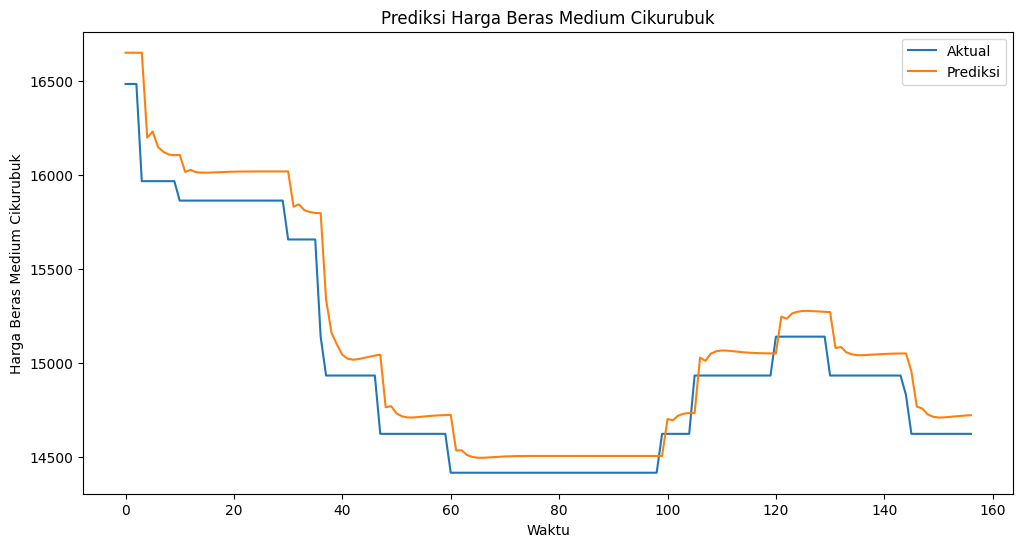

In [40]:
# prompt: buatkan code untuk membuat model lstm pada df_medium_cikurubuk

import matplotlib.pyplot as plt
import numpy as np
# Fungsi untuk membuat dataset LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Tentukan look_back (jumlah data sebelumnya yang digunakan untuk prediksi)
look_back = 30

# Persiapkan data latih
trainX_medium_cikurubuk, trainY_medium_cikurubuk = create_dataset(
    train_data_medium_cikurubuk['medium_cikurubuk_normalized'].values.reshape(-1, 1), look_back)

# Persiapkan data uji
testX_medium_cikurubuk, testY_medium_cikurubuk = create_dataset(
    test_data_medium_cikurubuk['medium_cikurubuk_normalized'].values.reshape(-1, 1), look_back)

# Reshape input data menjadi format yang diterima oleh LSTM (samples, time steps, features)
trainX_medium_cikurubuk = np.reshape(trainX_medium_cikurubuk, (trainX_medium_cikurubuk.shape[0], trainX_medium_cikurubuk.shape[1], 1))
testX_medium_cikurubuk = np.reshape(testX_medium_cikurubuk, (testX_medium_cikurubuk.shape[0], testX_medium_cikurubuk.shape[1], 1))

# Buat model LSTM
model_medium_cikurubuk = Sequential()
model_medium_cikurubuk.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model_medium_cikurubuk.add(Dropout(0.2))
model_medium_cikurubuk.add(LSTM(units=50))
model_medium_cikurubuk.add(Dropout(0.2))
model_medium_cikurubuk.add(Dense(1))

# Compile model
model_medium_cikurubuk.compile(loss='mean_squared_error', optimizer='adam')

# Latih model
model_medium_cikurubuk.fit(trainX_medium_cikurubuk, trainY_medium_cikurubuk, epochs=100, batch_size=1, verbose=2)

# Simpan model
model_medium_cikurubuk.save('model_medium_cikurubuk.keras')

# Muat model (opsional, jika Anda ingin menggunakannya nanti)
# model_medium_cikurubuk = load_model('model_medium_cikurubuk.h5')

# Lakukan prediksi pada data uji
trainPredict_medium_cikurubuk = model_medium_cikurubuk.predict(trainX_medium_cikurubuk)
testPredict_medium_cikurubuk = model_medium_cikurubuk.predict(testX_medium_cikurubuk)

# Inverse transformasi prediksi dan data asli untuk mendapatkan nilai harga asli
trainPredict_medium_cikurubuk = scaler.inverse_transform(trainPredict_medium_cikurubuk)
trainY_medium_cikurubuk = scaler.inverse_transform([trainY_medium_cikurubuk])
testPredict_medium_cikurubuk = scaler.inverse_transform(testPredict_medium_cikurubuk)
testY_medium_cikurubuk = scaler.inverse_transform([testY_medium_cikurubuk])


# Hitung RMSE (Root Mean Squared Error) untuk evaluasi model
trainScore_medium_cikurubuk = np.sqrt(mean_squared_error(trainY_medium_cikurubuk[0], trainPredict_medium_cikurubuk[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_medium_cikurubuk))
testScore_medium_cikurubuk = np.sqrt(mean_squared_error(testY_medium_cikurubuk[0], testPredict_medium_cikurubuk[:,0]))
print('Test Score: %.2f RMSE' % (testScore_medium_cikurubuk))

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(testY_medium_cikurubuk[0], label='Aktual')
plt.plot(testPredict_medium_cikurubuk[:,0], label='Prediksi')
plt.xlabel('Waktu')
plt.ylabel('Harga Beras Medium Cikurubuk')
plt.title('Prediksi Harga Beras Medium Cikurubuk')
plt.legend()
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


717/717 - 22s - 31ms/step - loss: 0.0053
Epoch 2/100
717/717 - 12s - 16ms/step - loss: 0.0034
Epoch 3/100
717/717 - 12s - 17ms/step - loss: 0.0026
Epoch 4/100
717/717 - 10s - 15ms/step - loss: 0.0024
Epoch 5/100
717/717 - 8s - 11ms/step - loss: 0.0023
Epoch 6/100
717/717 - 10s - 14ms/step - loss: 0.0018
Epoch 7/100
717/717 - 10s - 14ms/step - loss: 0.0017
Epoch 8/100
717/717 - 8s - 11ms/step - loss: 0.0019
Epoch 9/100
717/717 - 12s - 17ms/step - loss: 0.0017
Epoch 10/100
717/717 - 12s - 16ms/step - loss: 0.0019
Epoch 11/100
717/717 - 19s - 26ms/step - loss: 0.0018
Epoch 12/100
717/717 - 11s - 15ms/step - loss: 0.0018
Epoch 13/100
717/717 - 8s - 11ms/step - loss: 0.0016
Epoch 14/100
717/717 - 10s - 14ms/step - loss: 0.0017
Epoch 15/100
717/717 - 9s - 13ms/step - loss: 0.0015
Epoch 16/100
717/717 - 8s - 12ms/step - loss: 0.0015
Epoch 17/100
717/717 - 12s - 17ms/step - loss: 0.0016
Epoch 18/100
717/717 - 9s - 13ms/step - loss: 0.0015
Epoch 19/100
717/717 - 9s - 12ms/step - loss: 0.0015
Ep

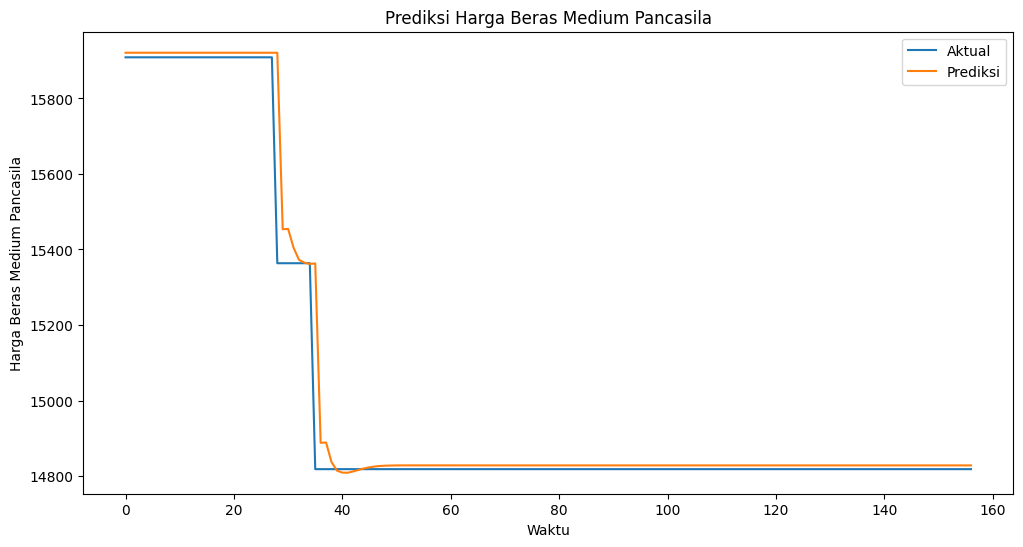

In [41]:
# prompt: buatkan code untuk membuat model lstm pada df_medium_pancasila

import matplotlib.pyplot as plt
import numpy as np
# Persiapkan data latih
trainX_medium_pancasila, trainY_medium_pancasila = create_dataset(
    train_data_medium_pancasila['medium_pancasila_normalized'].values.reshape(-1, 1), look_back)

# Persiapkan data uji
testX_medium_pancasila, testY_medium_pancasila = create_dataset(
    test_data_medium_pancasila['medium_pancasila_normalized'].values.reshape(-1, 1), look_back)

# Reshape input data menjadi format yang diterima oleh LSTM (samples, time steps, features)
trainX_medium_pancasila = np.reshape(trainX_medium_pancasila, (trainX_medium_pancasila.shape[0], trainX_medium_pancasila.shape[1], 1))
testX_medium_pancasila = np.reshape(testX_medium_pancasila, (testX_medium_pancasila.shape[0], testX_medium_pancasila.shape[1], 1))

# Buat model LSTM
model_medium_pancasila = Sequential()
model_medium_pancasila.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model_medium_pancasila.add(Dropout(0.2))
model_medium_pancasila.add(LSTM(units=50))
model_medium_pancasila.add(Dropout(0.2))
model_medium_pancasila.add(Dense(1))

# Compile model
model_medium_pancasila.compile(loss='mean_squared_error', optimizer='adam')

# Latih model
model_medium_pancasila.fit(trainX_medium_pancasila, trainY_medium_pancasila, epochs=100, batch_size=1, verbose=2)

# Simpan model
model_medium_pancasila.save('model_medium_pancasila.keras')

# Muat model (opsional, jika Anda ingin menggunakannya nanti)
# model_medium_pancasila = load_model('model_medium_pancasila.h5')

# Lakukan prediksi pada data uji
trainPredict_medium_pancasila = model_medium_pancasila.predict(trainX_medium_pancasila)
testPredict_medium_pancasila = model_medium_pancasila.predict(testX_medium_pancasila)

# Inverse transformasi prediksi dan data asli untuk mendapatkan nilai harga asli
trainPredict_medium_pancasila = scaler.inverse_transform(trainPredict_medium_pancasila)
trainY_medium_pancasila = scaler.inverse_transform([trainY_medium_pancasila])
testPredict_medium_pancasila = scaler.inverse_transform(testPredict_medium_pancasila)
testY_medium_pancasila = scaler.inverse_transform([testY_medium_pancasila])


# Hitung RMSE (Root Mean Squared Error) untuk evaluasi model
trainScore_medium_pancasila = np.sqrt(mean_squared_error(trainY_medium_pancasila[0], trainPredict_medium_pancasila[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_medium_pancasila))
testScore_medium_pancasila = np.sqrt(mean_squared_error(testY_medium_pancasila[0], testPredict_medium_pancasila[:,0]))
print('Test Score: %.2f RMSE' % (testScore_medium_pancasila))

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(testY_medium_pancasila[0], label='Aktual')
plt.plot(testPredict_medium_pancasila[:,0], label='Prediksi')
plt.xlabel('Waktu')
plt.ylabel('Harga Beras Medium Pancasila')
plt.title('Prediksi Harga Beras Medium Pancasila')
plt.legend()
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


717/717 - 12s - 17ms/step - loss: 0.0060
Epoch 2/100
717/717 - 8s - 11ms/step - loss: 0.0046
Epoch 3/100
717/717 - 11s - 16ms/step - loss: 0.0025
Epoch 4/100
717/717 - 11s - 15ms/step - loss: 0.0020
Epoch 5/100
717/717 - 9s - 12ms/step - loss: 0.0022
Epoch 6/100
717/717 - 9s - 13ms/step - loss: 0.0021
Epoch 7/100
717/717 - 10s - 13ms/step - loss: 0.0020
Epoch 8/100
717/717 - 8s - 12ms/step - loss: 0.0015
Epoch 9/100
717/717 - 11s - 15ms/step - loss: 0.0019
Epoch 10/100
717/717 - 12s - 16ms/step - loss: 0.0019
Epoch 11/100
717/717 - 10s - 15ms/step - loss: 0.0016
Epoch 12/100
717/717 - 8s - 11ms/step - loss: 0.0014
Epoch 13/100
717/717 - 12s - 16ms/step - loss: 0.0013
Epoch 14/100
717/717 - 11s - 15ms/step - loss: 0.0014
Epoch 15/100
717/717 - 8s - 12ms/step - loss: 0.0013
Epoch 16/100
717/717 - 11s - 15ms/step - loss: 0.0016
Epoch 17/100
717/717 - 10s - 14ms/step - loss: 0.0013
Epoch 18/100
717/717 - 9s - 12ms/step - loss: 0.0014
Epoch 19/100
717/717 - 10s - 14ms/step - loss: 0.0015
Ep

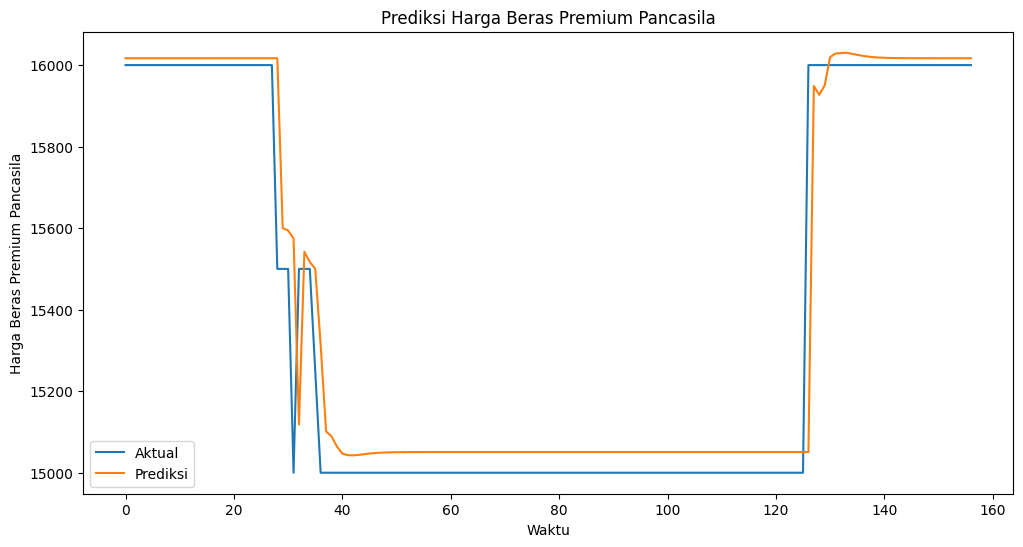

In [42]:
# prompt: buatkan code untuk membuat model lstm pada df_premium_pancasila

import matplotlib.pyplot as plt
import numpy as np
# Persiapkan data latih
trainX_premium_pancasila, trainY_premium_pancasila = create_dataset(
    train_data_premium_pancasila['premium_pancasila_normalized'].values.reshape(-1, 1), look_back)

# Persiapkan data uji
testX_premium_pancasila, testY_premium_pancasila = create_dataset(
    test_data_premium_pancasila['premium_pancasila_normalized'].values.reshape(-1, 1), look_back)

# Reshape input data menjadi format yang diterima oleh LSTM (samples, time steps, features)
trainX_premium_pancasila = np.reshape(trainX_premium_pancasila, (trainX_premium_pancasila.shape[0], trainX_premium_pancasila.shape[1], 1))
testX_premium_pancasila = np.reshape(testX_premium_pancasila, (testX_premium_pancasila.shape[0], testX_premium_pancasila.shape[1], 1))

# Buat model LSTM
model_premium_pancasila = Sequential()
model_premium_pancasila.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model_premium_pancasila.add(Dropout(0.2))
model_premium_pancasila.add(LSTM(units=50))
model_premium_pancasila.add(Dropout(0.2))
model_premium_pancasila.add(Dense(1))

# Compile model
model_premium_pancasila.compile(loss='mean_squared_error', optimizer='adam')

# Latih model
model_premium_pancasila.fit(trainX_premium_pancasila, trainY_premium_pancasila, epochs=100, batch_size=1, verbose=2)

# Simpan model
model_premium_pancasila.save('model_premium_pancasila.keras')

# Muat model (opsional, jika Anda ingin menggunakannya nanti)
# model_premium_pancasila = load_model('model_premium_pancasila.h5')

# Lakukan prediksi pada data uji
trainPredict_premium_pancasila = model_premium_pancasila.predict(trainX_premium_pancasila)
testPredict_premium_pancasila = model_premium_pancasila.predict(testX_premium_pancasila)

# Inverse transformasi prediksi dan data asli untuk mendapatkan nilai harga asli
trainPredict_premium_pancasila = scaler.inverse_transform(trainPredict_premium_pancasila)
trainY_premium_pancasila = scaler.inverse_transform([trainY_premium_pancasila])
testPredict_premium_pancasila = scaler.inverse_transform(testPredict_premium_pancasila)
testY_premium_pancasila = scaler.inverse_transform([testY_premium_pancasila])


# Hitung RMSE (Root Mean Squared Error) untuk evaluasi model
trainScore_premium_pancasila = np.sqrt(mean_squared_error(trainY_premium_pancasila[0], trainPredict_premium_pancasila[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_premium_pancasila))
testScore_premium_pancasila = np.sqrt(mean_squared_error(testY_premium_pancasila[0], testPredict_premium_pancasila[:,0]))
print('Test Score: %.2f RMSE' % (testScore_premium_pancasila))

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(testY_premium_pancasila[0], label='Aktual')
plt.plot(testPredict_premium_pancasila[:,0], label='Prediksi')
plt.xlabel('Waktu')
plt.ylabel('Harga Beras Premium Pancasila')
plt.title('Prediksi Harga Beras Premium Pancasila')
plt.legend()
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


717/717 - 12s - 17ms/step - loss: 0.0050
Epoch 2/100
717/717 - 8s - 11ms/step - loss: 0.0028
Epoch 3/100
717/717 - 12s - 16ms/step - loss: 0.0025
Epoch 4/100
717/717 - 10s - 14ms/step - loss: 0.0028
Epoch 5/100
717/717 - 8s - 11ms/step - loss: 0.0021
Epoch 6/100
717/717 - 11s - 15ms/step - loss: 0.0019
Epoch 7/100
717/717 - 10s - 14ms/step - loss: 0.0018
Epoch 8/100
717/717 - 8s - 11ms/step - loss: 0.0014
Epoch 9/100
717/717 - 10s - 14ms/step - loss: 0.0017
Epoch 10/100
717/717 - 12s - 17ms/step - loss: 0.0017
Epoch 11/100
717/717 - 10s - 14ms/step - loss: 0.0013
Epoch 12/100
717/717 - 8s - 11ms/step - loss: 0.0014
Epoch 13/100
717/717 - 11s - 16ms/step - loss: 0.0017
Epoch 14/100
717/717 - 9s - 13ms/step - loss: 0.0017
Epoch 15/100
717/717 - 8s - 11ms/step - loss: 0.0013
Epoch 16/100
717/717 - 11s - 15ms/step - loss: 0.0014
Epoch 17/100
717/717 - 10s - 14ms/step - loss: 0.0015
Epoch 18/100
717/717 - 8s - 12ms/step - loss: 0.0014
Epoch 19/100
717/717 - 10s - 14ms/step - loss: 0.0012
Ep

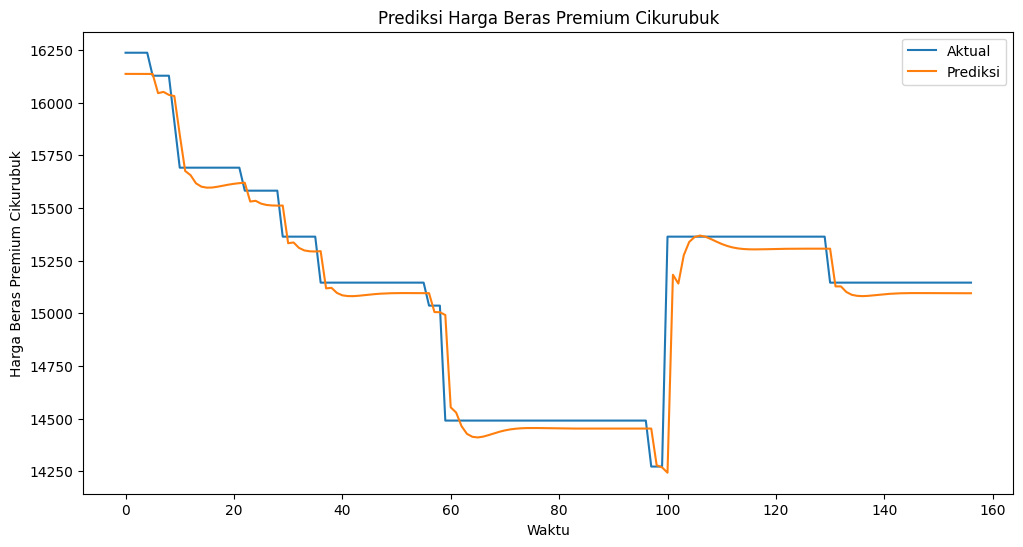

In [43]:
# prompt: buatkan code untuk membuat model lstm pada df_premium_cikurubuk

import matplotlib.pyplot as plt
import numpy as np
# Persiapkan data latih
trainX_premium_cikurubuk, trainY_premium_cikurubuk = create_dataset(
    train_data_premium_cikurubuk['premium_cikurubuk_normalized'].values.reshape(-1, 1), look_back)

# Persiapkan data uji
testX_premium_cikurubuk, testY_premium_cikurubuk = create_dataset(
    test_data_premium_cikurubuk['premium_cikurubuk_normalized'].values.reshape(-1, 1), look_back)

# Reshape input data menjadi format yang diterima oleh LSTM (samples, time steps, features)
trainX_premium_cikurubuk = np.reshape(trainX_premium_cikurubuk, (trainX_premium_cikurubuk.shape[0], trainX_premium_cikurubuk.shape[1], 1))
testX_premium_cikurubuk = np.reshape(testX_premium_cikurubuk, (testX_premium_cikurubuk.shape[0], testX_premium_cikurubuk.shape[1], 1))

# Buat model LSTM
model_premium_cikurubuk = Sequential()
model_premium_cikurubuk.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model_premium_cikurubuk.add(Dropout(0.2))
model_premium_cikurubuk.add(LSTM(units=50))
model_premium_cikurubuk.add(Dropout(0.2))
model_premium_cikurubuk.add(Dense(1))

# Compile model
model_premium_cikurubuk.compile(loss='mean_squared_error', optimizer='adam')

# Latih model
model_premium_cikurubuk.fit(trainX_premium_cikurubuk, trainY_premium_cikurubuk, epochs=100, batch_size=1, verbose=2)

# Simpan model
model_premium_cikurubuk.save('model_premium_cikurubuk.keras')

# Muat model (opsional, jika Anda ingin menggunakannya nanti)
# model_premium_cikurubuk = load_model('model_premium_cikurubuk.h5')

# Lakukan prediksi pada data uji
trainPredict_premium_cikurubuk = model_premium_cikurubuk.predict(trainX_premium_cikurubuk)
testPredict_premium_cikurubuk = model_premium_cikurubuk.predict(testX_premium_cikurubuk)

# Inverse transformasi prediksi dan data asli untuk mendapatkan nilai harga asli
trainPredict_premium_cikurubuk = scaler.inverse_transform(trainPredict_premium_cikurubuk)
trainY_premium_cikurubuk = scaler.inverse_transform([trainY_premium_cikurubuk])
testPredict_premium_cikurubuk = scaler.inverse_transform(testPredict_premium_cikurubuk)
testY_premium_cikurubuk = scaler.inverse_transform([testY_premium_cikurubuk])


# Hitung RMSE (Root Mean Squared Error) untuk evaluasi model
trainScore_premium_cikurubuk = np.sqrt(mean_squared_error(trainY_premium_cikurubuk[0], trainPredict_premium_cikurubuk[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_premium_cikurubuk))
testScore_premium_cikurubuk = np.sqrt(mean_squared_error(testY_premium_cikurubuk[0], testPredict_premium_cikurubuk[:,0]))
print('Test Score: %.2f RMSE' % (testScore_premium_cikurubuk))

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(testY_premium_cikurubuk[0], label='Aktual')
plt.plot(testPredict_premium_cikurubuk[:,0], label='Prediksi')
plt.xlabel('Waktu')
plt.ylabel('Harga Beras Premium Cikurubuk')
plt.title('Prediksi Harga Beras Premium Cikurubuk')
plt.legend()
plt.show()


In [95]:
# prompt: buatkan prediksi 10 hari kedapan untu load model_medium_cikurubuk.keras dari df_medium_cikurubuk

from tensorflow.keras.models import load_model
import numpy as np

# Muat model yang telah disimpan
model_medium_cikurubuk = load_model('model_medium_cikurubuk.keras')

# Ambil data terbaru dari df_medium_cikurubuk (sesuaikan dengan jumlah look_back)
last_data = df_medium_cikurubuk['medium_cikurubuk_normalized'].tail(look_back).values

# Buat array untuk menyimpan data prediksi
predicted_data = []

# Lakukan prediksi untuk 10 hari ke depan
for i in range(29):
  # Reshape data input untuk prediksi
  input_data = np.reshape(last_data, (1, look_back, 1))

  # Lakukan prediksi
  prediction = model_medium_cikurubuk.predict(input_data)

  # Simpan hasil prediksi
  predicted_data.append(prediction[0][0])

  # Update data input dengan menambahkan prediksi terbaru
  last_data = np.append(last_data[1:], prediction)

# Inverse transformasi prediksi untuk mendapatkan nilai harga asli
predicted_data = scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))

# Tampilkan hasil prediksi
print("Prediksi Harga Beras Medium Cikurubuk 10 Hari ke Depan:")
print(predicted_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [96]:
# prompt: buat menjadi data frame prediksi df_medium_cikurubuk dengan ada date nya juga

import pandas as pd
import numpy as np
# Muat model yang telah disimpan
model_medium_cikurubuk = load_model('model_medium_cikurubuk.keras')

# Ambil data terbaru dari df_medium_cikurubuk (sesuaikan dengan jumlah look_back)
last_data = df_medium_cikurubuk['medium_cikurubuk_normalized'].tail(look_back).values

# Buat array untuk menyimpan data prediksi dan tanggal
predicted_data = []
predicted_dates = []

# Dapatkan tanggal terakhir dari DataFrame
last_date = df_medium_cikurubuk['date'].iloc[-1]

# Lakukan prediksi untuk 10 hari ke depan
for i in range(29):
  # Reshape data input untuk prediksi
  input_data = np.reshape(last_data, (1, look_back, 1))

  # Lakukan prediksi
  prediction = model_medium_cikurubuk.predict(input_data)

  # Simpan hasil prediksi
  predicted_data.append(prediction[0][0])

  # Update data input dengan menambahkan prediksi terbaru
  last_data = np.append(last_data[1:], prediction)

  # Hitung tanggal berikutnya
  next_date = pd.to_datetime(last_date) + pd.DateOffset(days=1)
  predicted_dates.append(next_date.date())

  # Update tanggal terakhir
  last_date = next_date

# Inverse transformasi prediksi untuk mendapatkan nilai harga asli
predicted_data = scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))

# Buat DataFrame untuk hasil prediksi
df_prediksi_medium_cikurubuk = pd.DataFrame({'date': predicted_dates, 'medium_cikurubuk_prediksi': predicted_data.flatten()})

# Tampilkan DataFrame prediksi
print("Prediksi Harga Beras Medium Cikurubuk 10 Hari ke Depan:")
print(df_prediksi_medium_cikurubuk)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

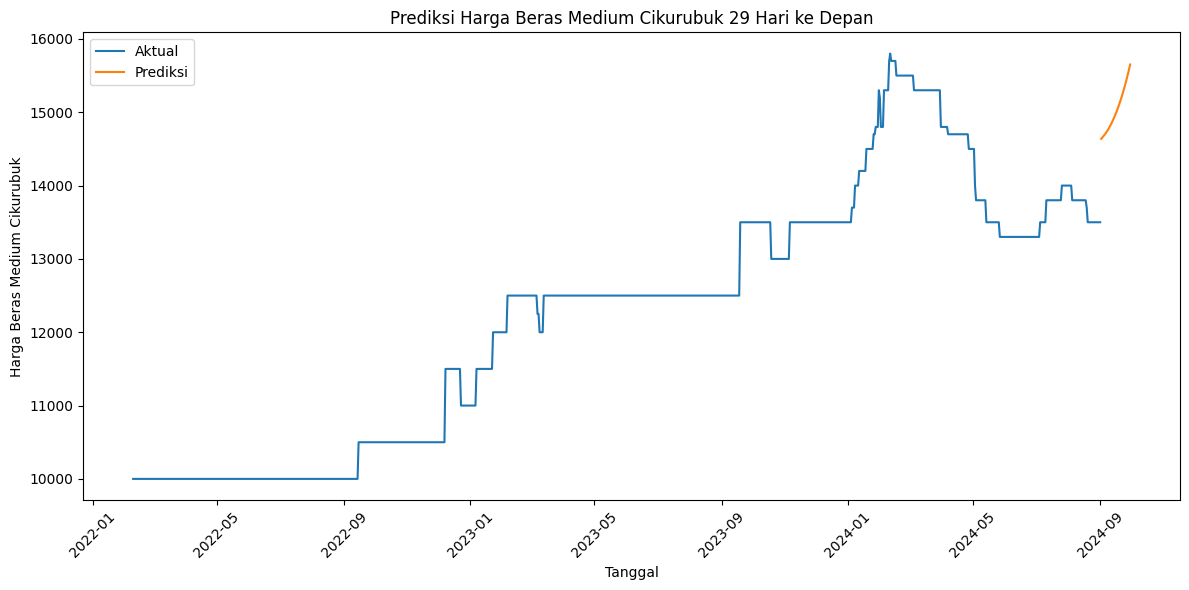

In [97]:
# prompt: buat dalam grafik hasil dari prediksinya dan bandingkan dengan data aktual dan prediksi tambahkan date

import pandas as pd
import matplotlib.pyplot as plt
# Mendapatkan tanggal terakhir dari data aktual
last_date = df_medium_cikurubuk['date'].iloc[-1]

# Membuat daftar tanggal untuk prediksi (sesuaikan dengan jumlah hari prediksi)
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=29).tolist()

# Membuat DataFrame untuk hasil prediksi
prediction_df = pd.DataFrame({'date': future_dates, 'Prediksi': predicted_data.flatten()})

# Menggabungkan data aktual dan prediksi dalam satu plot
plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(df_medium_cikurubuk['date'], df_medium_cikurubuk['medium_cikurubuk'], label='Aktual')

# Plot data prediksi
plt.plot(prediction_df['date'], prediction_df['Prediksi'], label='Prediksi')

plt.xlabel('Tanggal')
plt.ylabel('Harga Beras Medium Cikurubuk')
plt.title('Prediksi Harga Beras Medium Cikurubuk 29 Hari ke Depan')
plt.legend()
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak plot agar label tidak terpotong
plt.show()


In [47]:
# prompt: buat menjadi data frame prediksi df_medium_pancasila dengan ada date nya juga

import pandas as pd
import numpy as np
# Muat model yang telah disimpan
model_medium_pancasila = load_model('model_medium_pancasila.keras')

# Ambil data terbaru dari df_medium_pancasila (sesuaikan dengan jumlah look_back)
last_data = df_medium_pancasila['medium_pancasila_normalized'].tail(look_back).values

# Buat array untuk menyimpan data prediksi dan tanggal
predicted_data = []
predicted_dates = []

# Dapatkan tanggal terakhir dari DataFrame
last_date = df_medium_pancasila['date'].iloc[-1]

# Lakukan prediksi untuk 29 hari ke depan
for i in range(29):
  # Reshape data input untuk prediksi
  input_data = np.reshape(last_data, (1, look_back, 1))

  # Lakukan prediksi
  prediction = model_medium_pancasila.predict(input_data)

  # Simpan hasil prediksi
  predicted_data.append(prediction[0][0])

  # Update data input dengan menambahkan prediksi terbaru
  last_data = np.append(last_data[1:], prediction)

  # Hitung tanggal berikutnya
  next_date = pd.to_datetime(last_date) + pd.DateOffset(days=1)
  predicted_dates.append(next_date.date())

  # Update tanggal terakhir
  last_date = next_date

# Inverse transformasi prediksi untuk mendapatkan nilai harga asli
predicted_data = scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))

# Buat DataFrame untuk hasil prediksi
df_prediksi_medium_pancasila = pd.DataFrame({'date': predicted_dates, 'medium_pancasila_prediksi': predicted_data.flatten()})

# Tampilkan DataFrame prediksi
print("Prediksi Harga Beras Medium Pancasila 29 Hari ke Depan:")
print(df_prediksi_medium_pancasila)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

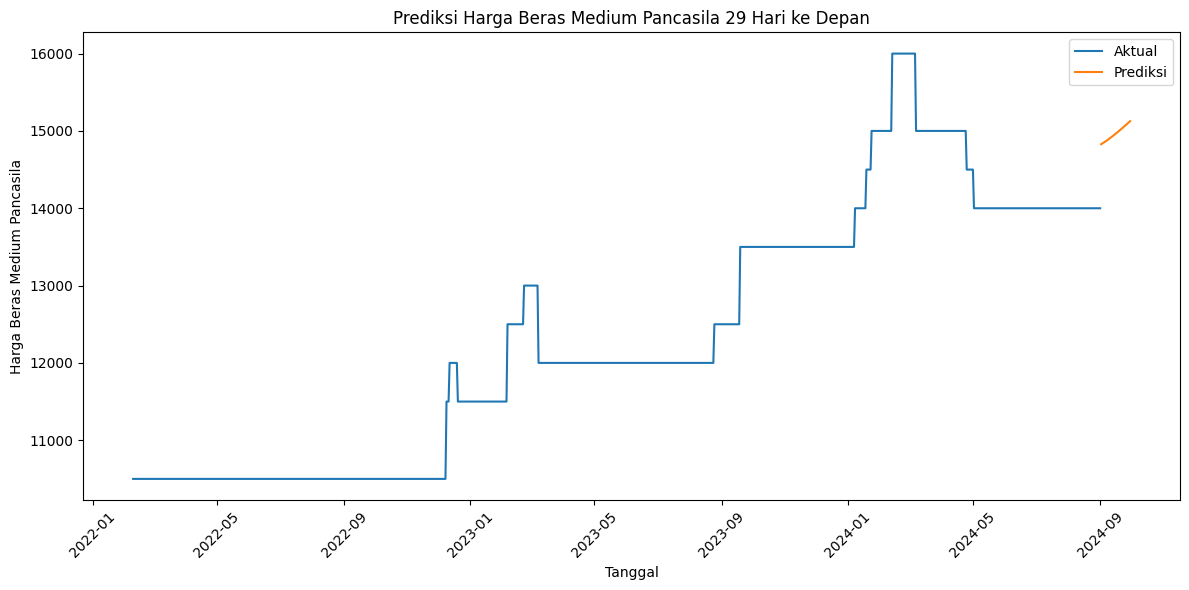

In [53]:
# prompt: buatkan prediksi 29 hari kedapan untu load model_medium_cikurubuk.keras dari df_medium_pancasila

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Muat model yang telah disimpan
model_medium_cikurubuk = load_model('model_medium_pancasila.keras')

# Ambil data terbaru dari df_medium_pancasila (sesuaikan dengan jumlah look_back)
last_data = df_medium_pancasila['medium_pancasila_normalized'].tail(look_back).values

# Buat array untuk menyimpan data prediksi
predicted_data = []

# Lakukan prediksi untuk 29 hari ke depan
for i in range(29):
  # Reshape data input untuk prediksi
  input_data = np.reshape(last_data, (1, look_back, 1))

  # Lakukan prediksi
  prediction = model_medium_cikurubuk.predict(input_data)

  # Simpan hasil prediksi
  predicted_data.append(prediction[0][0])

  # Update data input dengan menambahkan prediksi terbaru
  last_data = np.append(last_data[1:], prediction)

# Inverse transformasi prediksi untuk mendapatkan nilai harga asli
predicted_data = scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))

# Tampilkan hasil prediksi
print("Prediksi Harga Beras Medium Pancasila 29 Hari ke Depan")
print(predicted_data)


# Mendapatkan tanggal terakhir dari data aktual
last_date = df_medium_pancasila['date'].iloc[-1]

# Membuat daftar tanggal untuk prediksi (sesuaikan dengan jumlah hari prediksi)
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=29).tolist()

# Membuat DataFrame untuk hasil prediksi
prediction_df = pd.DataFrame({'date': future_dates, 'Prediksi': predicted_data.flatten()})

# Menggabungkan data aktual dan prediksi dalam satu plot
plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(df_medium_pancasila['date'], df_medium_pancasila['medium_pancasila'], label='Aktual')

# Plot data prediksi
plt.plot(prediction_df['date'], prediction_df['Prediksi'], label='Prediksi')

plt.xlabel('Tanggal')
plt.ylabel('Harga Beras Medium Pancasila')
plt.title('Prediksi Harga Beras Medium Pancasila 29 Hari ke Depan')
plt.legend()
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak plot agar label tidak terpotong
plt.show()


In [49]:
# prompt: buat menjadi data frame prediksi df_premium_pancasila dengan ada date nya juga

import pandas as pd
# Mendapatkan tanggal terakhir dari data aktual
last_date = df_premium_pancasila['date'].iloc[-1]

# Membuat daftar tanggal untuk prediksi (sesuaikan dengan jumlah hari prediksi)
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=len(testPredict_premium_pancasila)).tolist()

# Membuat DataFrame untuk hasil prediksi
df_premium_pancasila = pd.DataFrame({'date': future_dates, 'premium_pancasila_prediksi': testPredict_premium_pancasila[:,0]})

# Tampilkan DataFrame prediksi
print("Prediksi Harga Beras Premium Pancasila:")
print(df_premium_pancasila)


Prediksi Harga Beras Premium Pancasila:
          date  premium_pancasila_prediksi
0   2024-09-02                16016.789062
1   2024-09-03                16016.801758
2   2024-09-04                16016.807617
3   2024-09-05                16016.811523
4   2024-09-06                16016.811523
..         ...                         ...
152 2025-02-01                16016.810547
153 2025-02-02                16016.810547
154 2025-02-03                16016.811523
155 2025-02-04                16016.811523
156 2025-02-05                16016.811523

[157 rows x 2 columns]


In [60]:
df_premium_pancasila.head()

,date,premium_pancasila_prediksi
0,2024-09-02,16016.789062
1,2024-09-03,16016.801758
2,2024-09-04,16016.807617
3,2024-09-05,16016.811523
4,2024-09-06,16016.811523


In [100]:
# prompt: buatkan prediksi 29 hari kedapan untu load df_premium_pancasila dengan data frame untuk hasil prediksinya

import pandas as pd
import numpy as np
# Muat model yang telah disimpan
model_premium_pancasila = load_model('model_premium_pancasila.keras')

# Ambil data terbaru dari df_premium_pancasila (sesuaikan dengan jumlah look_back)
last_data = df_premium_pancasila['premium_pancasila_normalized'].tail(look_back).values

# Buat array untuk menyimpan data prediksi dan tanggal
predicted_data = []
predicted_dates = []

# Dapatkan tanggal terakhir dari DataFrame
last_date = df_premium_pancasila['date'].iloc[-1]

# Lakukan prediksi untuk 29 hari ke depan
for i in range(29):
  # Reshape data input untuk prediksi
  input_data = np.reshape(last_data, (1, look_back, 1))

  # Lakukan prediksi
  prediction = model_premium_pancasila.predict(input_data)

  # Simpan hasil prediksi
  predicted_data.append(prediction[0][0])

  # Update data input dengan menambahkan prediksi terbaru
  last_data = np.append(last_data[1:], prediction)

  # Hitung tanggal berikutnya
  next_date = pd.to_datetime(last_date) + pd.DateOffset(days=1)
  predicted_dates.append(next_date.date())

  # Update tanggal terakhir
  last_date = next_date

# Inverse transformasi prediksi untuk mendapatkan nilai harga asli
predicted_data = scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))

# Buat DataFrame untuk hasil prediksi
df_prediksi_premium_pancasila = pd.DataFrame({'date': predicted_dates, 'premium_pancasila_prediksi': predicted_data.flatten()})

# Tampilkan DataFrame prediksi
print("Prediksi Harga Beras Premium Pancasila 29 Hari ke Depan:")
print(df_prediksi_premium_pancasila)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

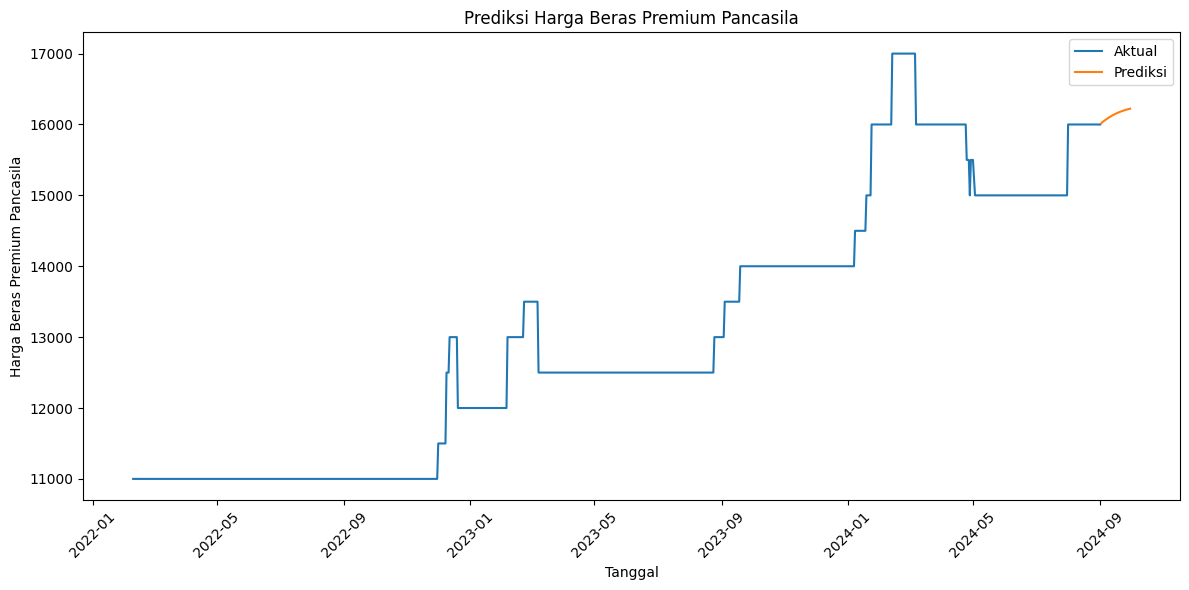

In [106]:
# prompt: buatkan visualisasi dari hasil prediksi dari df_premiun_pancasila

import pandas as pd
import matplotlib.pyplot as plt
# Mendapatkan tanggal terakhir dari data aktual
last_date = df_premium_pancasila['date'].iloc[-1]

# Membuat daftar tanggal untuk prediksi (sesuaikan dengan jumlah hari prediksi)
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=len(testPredict_premium_pancasila)).tolist()

# Menggabungkan data aktual dan prediksi dalam satu plot
plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(df_premium_pancasila['date'], df_premium_pancasila['premium_pancasila'], label='Aktual')

# Plot data prediksi
plt.plot(df_prediksi_premium_pancasila['date'], df_prediksi_premium_pancasila['premium_pancasila_prediksi'], label='Prediksi')

plt.xlabel('Tanggal')
plt.ylabel('Harga Beras Premium Pancasila')
plt.title('Prediksi Harga Beras Premium Pancasila')
plt.legend()
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak plot agar label tidak terpotong
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

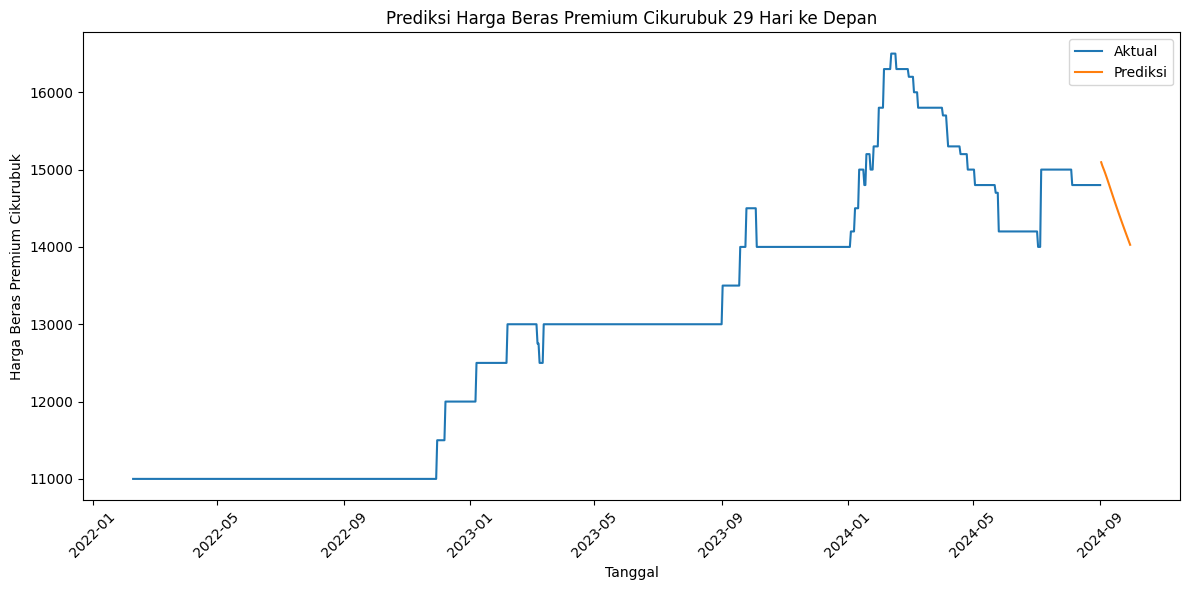

In [99]:
# prompt: buatkan visualisasi dari hasil prediksi dari df_premiun_cikurubuk

import pandas as pd
import matplotlib.pyplot as plt
# Mendapatkan tanggal terakhir dari data aktual
last_date = df_premium_cikurubuk['date'].iloc[-1]

# Membuat daftar tanggal untuk prediksi (sesuaikan dengan jumlah hari prediksi)
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=len(predicted_data)).tolist()

# Membuat DataFrame untuk hasil prediksi
prediction_df = pd.DataFrame({'date': future_dates, 'Prediksi': predicted_data.flatten()})

# Menggabungkan data aktual dan prediksi dalam satu plot
plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(df_premium_cikurubuk['date'], df_premium_cikurubuk['premium_cikurubuk'], label='Aktual')

# Plot data prediksi
plt.plot(prediction_df['date'], prediction_df['Prediksi'], label='Prediksi')

plt.xlabel('Tanggal')
plt.ylabel('Harga Beras Premium Cikurubuk')
plt.title('Prediksi Harga Beras Premium Cikurubuk 29 Hari ke Depan')
plt.legend()
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak plot agar label tidak terpotong
plt.show()


In [88]:
from datetime import timedelta

# Fungsi untuk menghitung persentase kenaikan
def hitung_persentase_kenaikan(hn, hn_plus_1):
    return (hn_plus_1 - hn) / hn * 100

# Fungsi untuk memprediksi harga beras di masa depan
def prediksi_harga_beras(harga_hari_sebelumnya, persentase_kenaikan):
    return harga_hari_sebelumnya * (1 + (persentase_kenaikan / 100))

# Fungsi untuk menghitung persentase kenaikan antara dua hari dari tahun sebelumnya
def hitung_persentase_kenaikan_tahun_sebelumnya(df, jenis_beras, tanggal_prediksi):
    # Cari tanggal yang sesuai di tahun sebelumnya
    tahun_sebelumnya = tanggal_prediksi - timedelta(days=365)
    hari_sebelum = tahun_sebelumnya - timedelta(days=1)

    # Ambil harga dari tahun sebelumnya
    harga_hari_sebelum = df.loc[df['date'] == hari_sebelum, jenis_beras].values
    harga_tahun_sebelumnya = df.loc[df['date'] == tahun_sebelumnya, jenis_beras].values

    if len(harga_hari_sebelum) > 0 and len(harga_tahun_sebelumnya) > 0:
        return hitung_persentase_kenaikan(harga_hari_sebelum[0], harga_tahun_sebelumnya[0])
    return 0  # Jika data tidak ditemukan, anggap tidak ada kenaikan

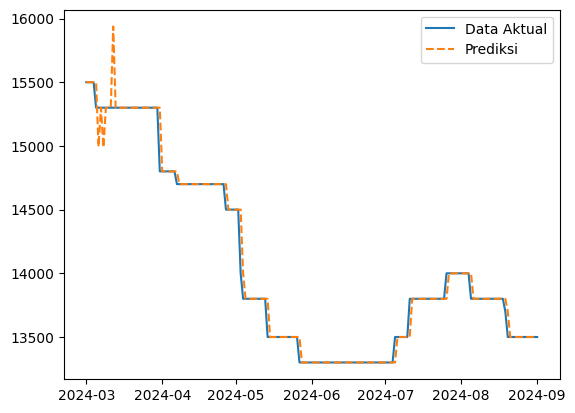

In [89]:
# Tentukan rentang tanggal prediksi
tanggal_awal_prediksi = pd.to_datetime('2024-03-01')
tanggal_akhir_prediksi = pd.to_datetime('2024-09-01')

# Membuat list untuk menyimpan hasil prediksi
hasil_prediksi = []

# Iterasi untuk setiap tanggal dalam rentang prediksi
for tanggal_prediksi in pd.date_range(start=tanggal_awal_prediksi, end=tanggal_akhir_prediksi):
    # Hitung persentase kenaikan tahun sebelumnya
    persentase_kenaikan_tahun_sebelumnya = hitung_persentase_kenaikan_tahun_sebelumnya(df_medium_cikurubuk, 'medium_cikurubuk', tanggal_prediksi)

    # Ambil harga hari sebelumnya
    harga_hari_sebelumnya = df_medium_cikurubuk[df_medium_cikurubuk['date'] == tanggal_prediksi - pd.Timedelta(days=1)]['medium_cikurubuk'].values[0]

    # Prediksi harga
    harga_prediksi = prediksi_harga_beras(harga_hari_sebelumnya, persentase_kenaikan_tahun_sebelumnya)
    hasil_prediksi.append(harga_prediksi)

# Membuat DataFrame untuk hasil prediksi
df_medium_cikurubuk_prediksi = pd.DataFrame({'date': pd.date_range(start=tanggal_awal_prediksi, end=tanggal_akhir_prediksi),
                           'harga_prediksi': hasil_prediksi})

df_filtered = df_medium_cikurubuk[(df_medium_cikurubuk['date'] >= '2024-03-01') &
                                   (df_medium_cikurubuk['date'] <= '2024-09-01')]

# Visualisasi
plt.plot(df_filtered['date'], df_filtered['medium_cikurubuk'], label='Data Aktual')
plt.plot(df_medium_cikurubuk_prediksi['date'], df_medium_cikurubuk_prediksi['harga_prediksi'], label='Prediksi', linestyle='--')
plt.legend()
plt.show()

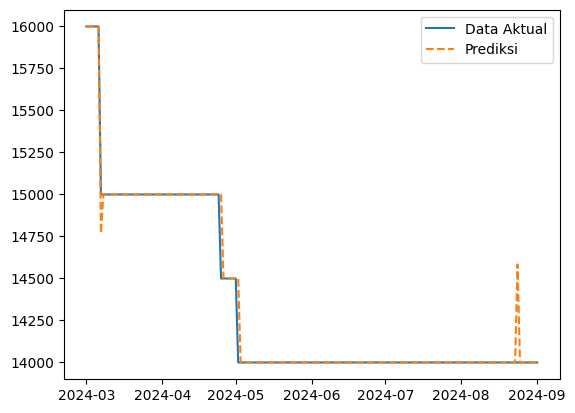

In [90]:
# Tentukan rentang tanggal prediksi
tanggal_awal_prediksi = pd.to_datetime('2024-03-01')
tanggal_akhir_prediksi = pd.to_datetime('2024-09-01')

# Membuat list untuk menyimpan hasil prediksi
hasil_prediksi = []

# Iterasi untuk setiap tanggal dalam rentang prediksi
for tanggal_prediksi in pd.date_range(start=tanggal_awal_prediksi, end=tanggal_akhir_prediksi):
    # Hitung persentase kenaikan tahun sebelumnya
    persentase_kenaikan_tahun_sebelumnya = hitung_persentase_kenaikan_tahun_sebelumnya(df_medium_pancasila, 'medium_pancasila', tanggal_prediksi)

    # Ambil harga hari sebelumnya
    harga_hari_sebelumnya = df_medium_pancasila[df_medium_pancasila['date'] == tanggal_prediksi - pd.Timedelta(days=1)]['medium_pancasila'].values[0]

    # Prediksi harga
    harga_prediksi = prediksi_harga_beras(harga_hari_sebelumnya, persentase_kenaikan_tahun_sebelumnya)
    hasil_prediksi.append(harga_prediksi)

# Membuat DataFrame untuk hasil prediksi
df_medium_pancasila_prediksi = pd.DataFrame({'date': pd.date_range(start=tanggal_awal_prediksi, end=tanggal_akhir_prediksi),
                           'harga_prediksi': hasil_prediksi})

df_filtered = df_medium_pancasila[(df_medium_pancasila['date'] >= '2024-03-01') &
                                   (df_medium_pancasila['date'] <= '2024-09-01')]

# Visualisasi
plt.plot(df_filtered['date'], df_filtered['medium_pancasila'], label='Data Aktual')
plt.plot(df_medium_pancasila_prediksi['date'], df_medium_pancasila_prediksi['harga_prediksi'], label='Prediksi', linestyle='--')
plt.legend()
plt.show()

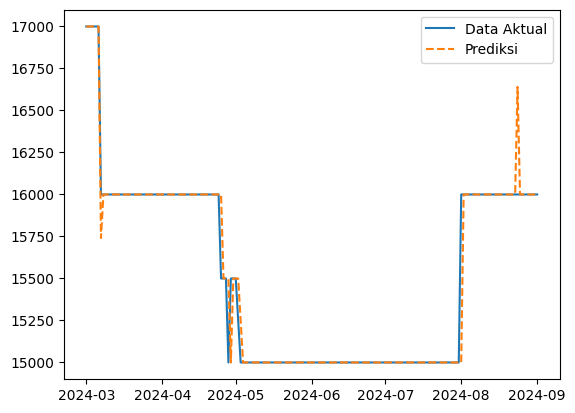

In [91]:
# Tentukan rentang tanggal prediksi
tanggal_awal_prediksi = pd.to_datetime('2024-03-01')
tanggal_akhir_prediksi = pd.to_datetime('2024-09-01')

# Membuat list untuk menyimpan hasil prediksi
hasil_prediksi = []

# Iterasi untuk setiap tanggal dalam rentang prediksi
for tanggal_prediksi in pd.date_range(start=tanggal_awal_prediksi, end=tanggal_akhir_prediksi):
    # Hitung persentase kenaikan tahun sebelumnya
    persentase_kenaikan_tahun_sebelumnya = hitung_persentase_kenaikan_tahun_sebelumnya(df_premium_pancasila, 'premium_pancasila', tanggal_prediksi)

    # Ambil harga hari sebelumnya
    harga_hari_sebelumnya = df_premium_pancasila[df_premium_pancasila['date'] == tanggal_prediksi - pd.Timedelta(days=1)]['premium_pancasila'].values[0]

    # Prediksi harga
    harga_prediksi = prediksi_harga_beras(harga_hari_sebelumnya, persentase_kenaikan_tahun_sebelumnya)
    hasil_prediksi.append(harga_prediksi)

# Membuat DataFrame untuk hasil prediksi
df_premium_pancasila_prediksi = pd.DataFrame({'date': pd.date_range(start=tanggal_awal_prediksi, end=tanggal_akhir_prediksi),
                           'harga_prediksi': hasil_prediksi})

df_filtered = df_premium_pancasila[(df_premium_pancasila['date'] >= '2024-03-01') &
                                   (df_premium_pancasila['date'] <= '2024-09-01')]

# Visualisasi
plt.plot(df_filtered['date'], df_filtered['premium_pancasila'], label='Data Aktual')
plt.plot(df_premium_pancasila_prediksi['date'], df_premium_pancasila_prediksi['harga_prediksi'], label='Prediksi', linestyle='--')
plt.legend()
plt.show()

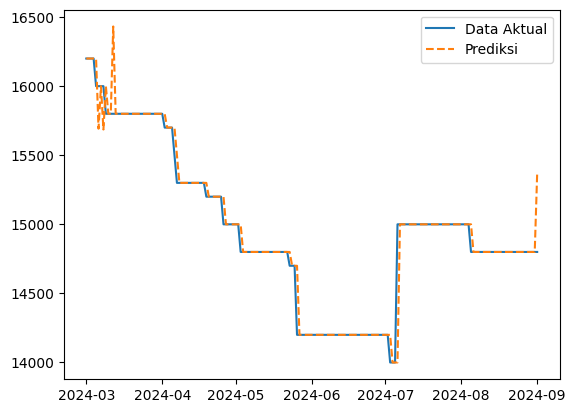

In [92]:
# Tentukan rentang tanggal prediksi
tanggal_awal_prediksi = pd.to_datetime('2024-03-01')
tanggal_akhir_prediksi = pd.to_datetime('2024-09-01')

# Membuat list untuk menyimpan hasil prediksi
hasil_prediksi = []

# Iterasi untuk setiap tanggal dalam rentang prediksi
for tanggal_prediksi in pd.date_range(start=tanggal_awal_prediksi, end=tanggal_akhir_prediksi):
    # Hitung persentase kenaikan tahun sebelumnya
    persentase_kenaikan_tahun_sebelumnya = hitung_persentase_kenaikan_tahun_sebelumnya(df_premium_cikurubuk, 'premium_cikurubuk', tanggal_prediksi)

    # Ambil harga hari sebelumnya
    harga_hari_sebelumnya = df_premium_cikurubuk[df_premium_cikurubuk['date'] == tanggal_prediksi - pd.Timedelta(days=1)]['premium_cikurubuk'].values[0]

    # Prediksi harga
    harga_prediksi = prediksi_harga_beras(harga_hari_sebelumnya, persentase_kenaikan_tahun_sebelumnya)
    hasil_prediksi.append(harga_prediksi)

# Membuat DataFrame untuk hasil prediksi
df_premium_cikurubuk_prediksi = pd.DataFrame({'date': pd.date_range(start=tanggal_awal_prediksi, end=tanggal_akhir_prediksi),
                           'harga_prediksi': hasil_prediksi})

df_filtered = df_premium_cikurubuk[(df_premium_cikurubuk['date'] >= '2024-03-01') &
                                   (df_premium_cikurubuk['date'] <= '2024-09-01')]

# Visualisasi
plt.plot(df_filtered['date'], df_filtered['premium_cikurubuk'], label='Data Aktual')
plt.plot(df_premium_cikurubuk_prediksi['date'], df_premium_cikurubuk_prediksi['harga_prediksi'], label='Prediksi', linestyle='--')
plt.legend()
plt.show()

In [ ]:
# prompt: cek version tensorflow

import tensorflow as tf
print(tf.__version__)
